# Libraries & Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load Data

In [111]:
# gervasio file_path
file_path = r"C:\Users\gerva\OneDrive\Documentos\GitHub\ST498_CAPSTONE\FLASH\toShare"

In [ ]:
# shruti


In [112]:
# fin

## Preliminary Data Processing for Control & Intervention

In [113]:
import pandas as pd
import os

# -----------------------------------------------------------------------------
# Step 0.1: Distinct date ranges for Pre and Post
# -----------------------------------------------------------------------------
pre_start = pd.Timestamp("2023-02-01 00:00:00")
pre_end   = pd.Timestamp("2024-01-31 23:59:59")

post_start = pd.Timestamp("2024-04-01 00:00:00")
post_end   = pd.Timestamp("2024-12-31 23:59:59")

def preprocess_and_aggregate(file_name, start_date, end_date):
    df = pd.read_csv(os.path.join(file_path, file_name))
    df = df.rename(columns={'Unnamed: 0': 'Time'})
    
    # Convert Time column to datetime
    df['Time'] = pd.to_datetime(df['Time'], format="%Y-%m-%d %H:%M:%S")
    print(f"Processing {file_name} -> Min Time: {df['Time'].min()}, Max Time: {df['Time'].max()}")
    df = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)] # Filter by time range (pre or post)
    df = df[(df['Time'].dt.hour >= 16) & (df['Time'].dt.hour < 19)] # Keep only 4-7 PM consumption    
    df_long = df.melt(id_vars=['Time'], var_name='ANON_ID', value_name='ELEC_KWH') # Convert from wide to long format
    df_long.drop_duplicates(subset=['Time', 'ANON_ID'], inplace=True) # Remove duplicates after melting
    df_agg = df_long.groupby('ANON_ID', as_index=False)['ELEC_KWH'].mean() # Aggregate by ANON_ID (mean consumption from 4–7pm)

    return df_agg

def preprocess(file_name, start_date, end_date):
    df = pd.read_csv(os.path.join(file_path, file_name))
    df = df.rename(columns={'Unnamed: 0': 'Time'})
    
    # Convert Time column to datetime
    df['Time'] = pd.to_datetime(df['Time'], format="%Y-%m-%d %H:%M:%S")
    print(f"Processing {file_name} -> Min Time: {df['Time'].min()}, Max Time: {df['Time'].max()}")
    df = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)] # Filter by time range (pre or post)
    df = df[(df['Time'].dt.hour >= 16) & (df['Time'].dt.hour < 19)] # Keep only 4-7 PM consumption    
    df_long = df.melt(id_vars=['Time'], var_name='ANON_ID', value_name='ELEC_KWH') # Convert from wide to long format
    df_long.drop_duplicates(subset=['Time', 'ANON_ID'], inplace=True) # Remove duplicates after melting

    return df_long


# -----------------------------------------------------------------------------
# Process each file for the correct date range
# -----------------------------------------------------------------------------

# CONTROL: We assume:
#   controlePreConsolide.csv => belongs to the Pre period
#   controleConsolide.csv => belongs to the Post period (Mon–Sat)
#   controleConsolideSunday.csv => also belongs to the Post period, but specifically Sunday
# You can adapt as needed if your real data has different date spans.

df_control_pre        = preprocess_and_aggregate("controlePreConsolide.csv", pre_start, pre_end)
df_control_post       = preprocess_and_aggregate("controleConsolide.csv",    post_start, post_end)
df_control_sunday     = preprocess_and_aggregate("controleConsolideSunday.csv", post_start, post_end)

print("Shapes =>",
      "\nControl Pre:", df_control_pre.shape,
      "\nControl Post:", df_control_post.shape,
      "\nControl Sunday:", df_control_sunday.shape)

# INTERVENTION
df_intervention_pre   = preprocess_and_aggregate("interventionPreConsolide.csv", pre_start, pre_end)
df_intervention_post  = preprocess_and_aggregate("interventionConsolide.csv",    post_start, post_end)
df_intervention_sunday = preprocess_and_aggregate("interventionConsolideSunday.csv", post_start, post_end)

print("Shapes =>",
      "\nIntervention Pre:", df_intervention_pre.shape,
      "\nIntervention Post:", df_intervention_post.shape,
      "\nIntervention Sunday:", df_intervention_sunday.shape)


Processing controlePreConsolide.csv -> Min Time: 2023-02-02 00:00:00, Max Time: 2024-01-31 23:30:00
Processing controleConsolide.csv -> Min Time: 2024-04-01 00:00:00, Max Time: 2024-12-31 23:30:00
Processing controleConsolideSunday.csv -> Min Time: 2024-04-07 00:00:00, Max Time: 2024-12-29 23:30:00
Shapes => 
Control Pre: (320, 2) 
Control Post: (506, 2) 
Control Sunday: (503, 2)
Processing interventionPreConsolide.csv -> Min Time: 2023-02-02 00:00:00, Max Time: 2024-01-31 23:30:00
Processing interventionConsolide.csv -> Min Time: 2024-04-01 00:00:00, Max Time: 2024-12-31 23:30:00
Processing interventionConsolideSunday.csv -> Min Time: 2024-04-07 00:00:00, Max Time: 2024-12-29 23:30:00
Shapes => 
Intervention Pre: (387, 2) 
Intervention Post: (666, 2) 
Intervention Sunday: (663, 2)


In [26]:
df_control_pre

,Time,ANON_ID,ELEC_KWH
0,2023-02-02 16:00:00,4dd3317694364b953434dc42eff7f9950095c4ab537c3b...,0.243
1,2023-02-02 16:30:00,4dd3317694364b953434dc42eff7f9950095c4ab537c3b...,0.292
2,2023-02-02 17:00:00,4dd3317694364b953434dc42eff7f9950095c4ab537c3b...,0.260
3,2023-02-02 17:30:00,4dd3317694364b953434dc42eff7f9950095c4ab537c3b...,0.541
4,2023-02-02 18:00:00,4dd3317694364b953434dc42eff7f9950095c4ab537c3b...,0.400
...,...,...,...
691195,2024-01-31 16:30:00,f60dba48cf44f787a3215d3c0f33eecdde790c1637ce01...,0.535
691196,2024-01-31 17:00:00,f60dba48cf44f787a3215d3c0f33eecdde790c1637ce01...,0.840
691197,2024-01-31 17:30:00,f60dba48cf44f787a3215d3c0f33eecdde790c1637ce01...,0.658
691198,2024-01-31 18:00:00,f60dba48cf44f787a3215d3c0f33eecdde790c1637ce01...,1.006


329, 2)

## Read & Merge Socio-Economic Data

In [114]:
# Step 0.2 (unchanged)
import pandas as pd
import os

socio_file = "socioEcodata.csv"
socio_df = pd.read_csv(os.path.join(file_path, socio_file))

# Drop unneeded columns
cols_to_drop = [
    'ESTIMATED_CONSUMPTION_ELEC_DAY',
    'ESTIMATED_CONSUMPTION_ELEC_NIGHT',
    'ESTIMATED_CONSUMPTION_TOTAL'
]
socio_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Rename HASH_KEY -> ANON_ID
if 'HASH_KEY' in socio_df.columns:
    socio_df.rename(columns={'HASH_KEY': 'ANON_ID'}, inplace=True)

# Drop rows where any feature is missing (NaN)
socio_df.dropna(inplace=True)

# Remove 'Unknown'
features = [
    'AGE_GROUP', 'INCOME_CATEGORY', 'HOUSEHOLD_OCCUPANCY', 'CHILDREN_AT_HOME',
    'HOUSEHOLD_SIZE', 'NUMBER_OF_BEDROOMS', 'OCCUPATION', 'EMPLOYMENT_STATUS',
    'HIGHEST_QUALIFICATION', 'HOME_OWNERSHIP', 'HOME_TYPE', 'SOCIAL_GRADE',
    'TARIFF_GROUP', 'HOME_VALUE'
]
mask_no_unknown = (socio_df[features] != 'Unknown').all(axis=1)
socio_df = socio_df[mask_no_unknown].copy()

print(f"Socio-economic data shape after cleaning: {socio_df.shape}")

# Convert columns with a logical order into ordered categories
age_group_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
income_category_order = [
    '0-9,999', '10,000-19,999', '20,000-29,999', '30,000-39,999', 
    '40,000-49,999', '50,000-74,999', '75,000-99,999', '100,000+'
]
household_occupancy_order = ['Single Adult Household', 'Couple Household', 'Multi-Occupancy Household']
children_at_home_order = ['0', '1', '2+']
household_size_order = ['1', '2', '3-4', '5+']
number_of_bedrooms_order = ['1', '2', '3', '4', '5+']
highest_qualification_order = [
    'GCSE Equivalent', 'A Level Equivalent', 
    'Secondary Education or Less', 'University Degree or Higher'
]
home_value_order = ['0-100k', '100-150k', '150-250k', '250-500k', '500k+']
social_grade_order = ['Social grade A', 'Social grade B', 'Social grade C1', 'Social grade C2', 'Social grade D']

feature_orders = {
    'AGE_GROUP': age_group_order,
    'INCOME_CATEGORY': income_category_order,
    'HOUSEHOLD_OCCUPANCY': household_occupancy_order,
    'CHILDREN_AT_HOME': children_at_home_order,
    'HOUSEHOLD_SIZE': household_size_order,
    'NUMBER_OF_BEDROOMS': number_of_bedrooms_order,
    'HIGHEST_QUALIFICATION': highest_qualification_order,
    'HOME_VALUE': home_value_order,
    'SOCIAL_GRADE': social_grade_order
}
for col, cat_order in feature_orders.items():
    if col in socio_df.columns:
        socio_df[col] = pd.Categorical(socio_df[col], categories=cat_order, ordered=True)


Socio-economic data shape after cleaning: (1044, 15)


## Merge Each Subset & Label Them

In [115]:
# Step 1: Merge & Label

df_control_pre_merged = pd.merge(df_control_pre, socio_df, on='ANON_ID', how='inner')
df_control_pre_merged['Group'] = 'Control'
df_control_pre_merged['Phase'] = 'Pre'

df_control_post_merged = pd.merge(df_control_post, socio_df, on='ANON_ID', how='inner')
df_control_post_merged['Group'] = 'Control'
df_control_post_merged['Phase'] = 'Post'

df_control_sunday_merged = pd.merge(df_control_sunday, socio_df, on='ANON_ID', how='inner')
df_control_sunday_merged['Group'] = 'Control'
df_control_sunday_merged['Phase'] = 'Sunday'


df_intervention_pre_merged = pd.merge(df_intervention_pre, socio_df, on='ANON_ID', how='inner')
df_intervention_pre_merged['Group'] = 'Intervention'
df_intervention_pre_merged['Phase'] = 'Pre'

df_intervention_post_merged = pd.merge(df_intervention_post, socio_df, on='ANON_ID', how='inner')
df_intervention_post_merged['Group'] = 'Intervention'
df_intervention_post_merged['Phase'] = 'Post'

df_intervention_sunday_merged = pd.merge(df_intervention_sunday, socio_df, on='ANON_ID', how='inner')
df_intervention_sunday_merged['Group'] = 'Intervention'
df_intervention_sunday_merged['Phase'] = 'Sunday'


print("Control Pre Merged:", df_control_pre_merged.shape)
print("Control Post Merged:", df_control_post_merged.shape)
print("Control Sunday Merged:", df_control_sunday_merged.shape)
print("Intervention Pre Merged:", df_intervention_pre_merged.shape)
print("Intervention Post Merged:", df_intervention_post_merged.shape)
print("Intervention Sunday Merged:", df_intervention_sunday_merged.shape)


Control Pre Merged: (286, 18)
Control Post Merged: (445, 18)
Control Sunday Merged: (445, 18)
Intervention Pre Merged: (343, 18)
Intervention Post Merged: (592, 18)
Intervention Sunday Merged: (591, 18)


## Pre-Post Comparisons

In [116]:
import numpy as np

# Combine only Pre and Post (exclude Sunday for the "shift" analysis)
df_combined_pre_post = pd.concat([
    df_control_pre_merged,
    df_control_post_merged,
    df_intervention_pre_merged,
    df_intervention_post_merged
], ignore_index=True)

# Group by ANON_ID, Group, Phase => get mean consumption
df_mean = (df_combined_pre_post
           .groupby(['ANON_ID','Group','Phase'], as_index=False)
           .agg(mean_kwh=('ELEC_KWH','mean')))

# Pivot so Pre, Post columns
df_pivot = df_mean.pivot(
    index=['ANON_ID','Group'],
    columns='Phase',
    values='mean_kwh'
).reset_index()

df_pivot['Reduction_%'] = ((df_pivot['Pre'] - df_pivot['Post']) / df_pivot['Pre']) * 100

# (Optional) Bracket assignment for Intervention
def bracket_assign(x):
    if pd.isna(x) or x < 5:
        return 'No Reward (< 5%)'
    elif x < 20:
        return 'Free Sun 8am-12pm (5-19.9%)'
    elif x < 35:
        return 'Free Sun 8am-4pm (20-34.9%)'
    elif x < 50:
        return 'Free Sun 8am-8pm (35-49.9%)'
    else:
        return 'Free Sun 8am-midnight (>=50%)'

df_pivot['Free_Energy_Bracket'] = np.where(
    df_pivot['Group'] == 'Intervention',
    df_pivot['Reduction_%'].apply(bracket_assign),
    'Not Applicable'
)

# Inspect final results
df_pivot.groupby('Group')['Reduction_%'].describe()


,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
Control,286.0,2.989691,21.111384,-120.422813,-4.381601,3.950899,14.056459,67.389872
Intervention,342.0,5.704356,25.272131,-198.620586,-4.249022,8.571329,18.493226,82.039628


## Visual Representation

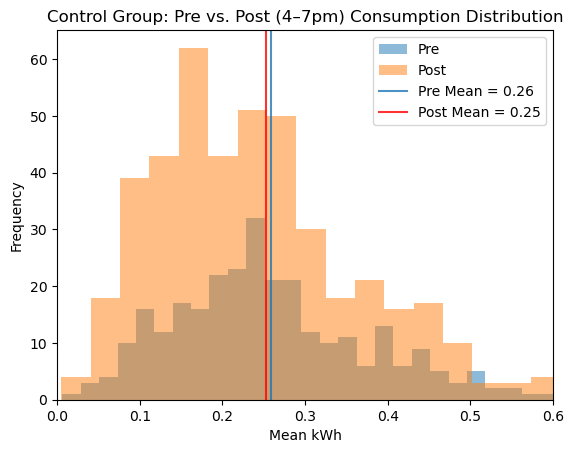

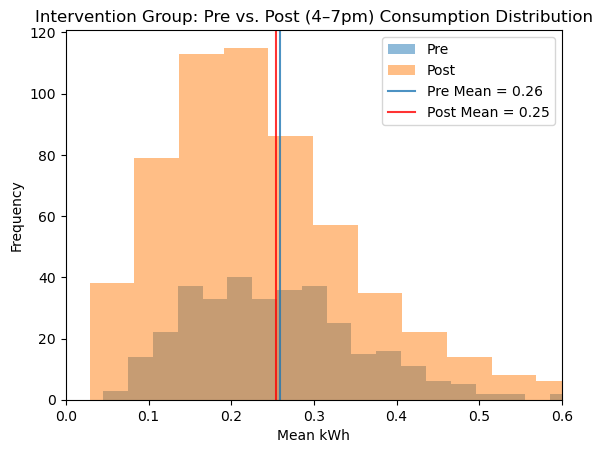

In [117]:
import matplotlib.pyplot as plt

# Suppose df_control and df_intervention each have 'Pre' and 'Post' columns
# created by pivoting your data. Something like:
df_control = df_pivot[df_pivot['Group'] == 'Control']
df_intervention = df_pivot[df_pivot['Group'] == 'Intervention']

# Calculate means
control_pre_mean = df_control['Pre'].mean()
control_post_mean = df_control['Post'].mean()
intervention_pre_mean = df_intervention['Pre'].mean()
intervention_post_mean = df_intervention['Post'].mean()

# -------------------------------------------------------------------------
# 1) CONTROL GROUP: Overlaid Histograms + Mean Lines
# -------------------------------------------------------------------------
plt.figure()

# Histograms
plt.hist(df_control['Pre'].dropna(), bins=30, alpha=0.5, label='Pre')
plt.hist(df_control['Post'].dropna(), bins=30, alpha=0.5, label='Post')

# Vertical lines for means
plt.axvline(x=control_pre_mean, alpha=0.8, label=f"Pre Mean = {control_pre_mean:.2f}")
plt.axvline(x=control_post_mean,  color ='red', alpha=0.8, label=f"Post Mean = {control_post_mean:.2f}")

plt.xlim(0, 0.6)
plt.title("Control Group: Pre vs. Post (4–7pm) Consumption Distribution")
plt.xlabel("Mean kWh")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# -------------------------------------------------------------------------
# 2) INTERVENTION GROUP: Overlaid Histograms + Mean Lines
# -------------------------------------------------------------------------
plt.figure()

# Histograms
plt.hist(df_intervention['Pre'].dropna(), bins=30, alpha=0.5, label='Pre')
plt.hist(df_intervention['Post'].dropna(), bins=30, alpha=0.5, label='Post')

# Vertical lines for means
plt.axvline(x=intervention_pre_mean, alpha=0.8, label=f"Pre Mean = {intervention_pre_mean:.2f}")
plt.axvline(x=intervention_post_mean,  color ='red', alpha=0.8, label=f"Post Mean = {intervention_post_mean:.2f}")

plt.xlim(0, 0.6)
plt.title("Intervention Group: Pre vs. Post (4–7pm) Consumption Distribution")
plt.xlabel("Mean kWh")
plt.ylabel("Frequency")
plt.legend()
plt.show()


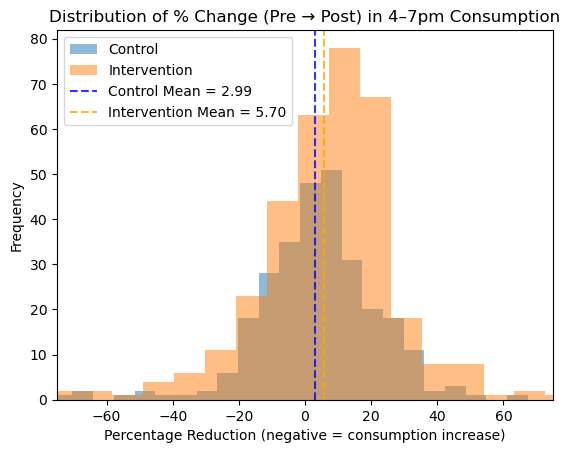

In [9]:
import matplotlib.pyplot as plt

# 1. Subset the data by group
df_control = df_pivot[df_pivot['Group'] == 'Control']
df_intervention = df_pivot[df_pivot['Group'] == 'Intervention']

# 2. Compute the means
control_mean = df_control['Reduction_%'].mean()
intervention_mean = df_intervention['Reduction_%'].mean()

plt.figure()

# 3. Plot the histograms in one chart
plt.hist(df_control['Reduction_%'].dropna(), bins=30, alpha=0.5, label='Control')
plt.hist(df_intervention['Reduction_%'].dropna(), bins=30, alpha=0.5, label='Intervention')

# 4. Add vertical lines at the mean values
plt.axvline(x=control_mean, color='blue', alpha=0.8, linestyle='--', label=f"Control Mean = {control_mean:.2f}")
plt.axvline(x=intervention_mean, color='orange', alpha=0.8, linestyle='--', label=f"Intervention Mean = {intervention_mean:.2f}")

# 5. (Optional) set x-limits based on your data range


plt.title("Distribution of % Change (Pre → Post) in 4–7pm Consumption")
plt.xlabel("Percentage Reduction (negative = consumption increase)")
plt.ylabel("Frequency")
plt.legend()
plt.xlim(-75, 75)
plt.show()


## Statistical Testing
Two sample test

In [19]:
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

df_control = df_pivot[df_pivot['Group'] == 'Control'].dropna(subset=['Reduction_%'])
df_intervention = df_pivot[df_pivot['Group'] == 'Intervention'].dropna(subset=['Reduction_%'])

control_reduction = df_control['Reduction_%']
intervention_reduction = df_intervention['Reduction_%']

# 1) Welch's t-test (doesn't assume equal variances)
t_stat, p_value = ttest_ind(
    control_reduction, 
    intervention_reduction, 
    equal_var=False
)
print(f"Welch t-test => t={t_stat:.3f}, p={p_value:.5f}")

# 2) Mann–Whitney U (non-parametric)
u_stat, mw_p_value = mannwhitneyu(
    control_reduction, 
    intervention_reduction, 
    alternative='two-sided'
)
print(f"Mann-Whitney => U={u_stat:.3f}, p={mw_p_value:.5f}")


Welch t-test => t=-1.467, p=0.14297
Mann-Whitney => U=43124.000, p=0.01067


### Results:
If the data are not normal or have heavy outliers, a standard t-test might be misleading.

A “household with extremely low Pre consumption” can produce large percentage swings, which might distort the average.

## Difference-in-Differences (DiD) Approach

In [12]:
df_for_did = df_mean[['ANON_ID','Group','Phase','mean_kwh']].copy()

# Now define your DiD variables:
df_for_did['treat'] = np.where(df_for_did['Group'] == 'Intervention', 1, 0)
df_for_did['post'] = np.where(df_for_did['Phase'] == 'Post', 1, 0)

df_for_did.rename(columns={'mean_kwh':'consumption'}, inplace=True)


In [26]:
import statsmodels.formula.api as smf

model = smf.ols("consumption ~ treat + post + treat:post", data=df_for_did).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2022
Date:                Fri, 21 Mar 2025   Prob (F-statistic):              0.895
Time:                        12:07:21   Log-Likelihood:                 853.45
No. Observations:                1666   AIC:                            -1699.
Df Residuals:                    1662   BIC:                            -1677.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2589      0.009     30.164      0.0

In [13]:
import statsmodels.formula.api as smf

# Suppose df_for_did has columns:
#   [ANON_ID, treat (0 or 1), post (0 or 1), consumption]

# 1) Simple OLS DiD:
model = smf.ols("consumption ~ treat + post + treat:post", data=df_for_did).fit()
print(model.summary())

# 2) Check the coefficient for treat:post
did_coef = model.params['treat:post']
did_ci = model.conf_int().loc['treat:post']
print(f"DiD Estimate = {did_coef:.4f}, 95% CI = ({did_ci[0]:.4f}, {did_ci[1]:.4f})")

# 3) Potentially with robust SE or clustering
model_robust = smf.ols("consumption ~ treat + post + treat:post", data=df_for_did).fit(cov_type='HC3')
print(model_robust.summary())

# or cluster by household if each row was (household, date) multiple times
model_cluster = smf.ols("consumption ~ treat + post + treat:post", data=df_for_did).fit(
    cov_type='cluster', cov_kwds={'groups': df_for_did['ANON_ID']}
)
print(model_cluster.summary())


                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2022
Date:                Sun, 23 Mar 2025   Prob (F-statistic):              0.895
Time:                        17:10:10   Log-Likelihood:                 853.45
No. Observations:                1666   AIC:                            -1699.
Df Residuals:                    1662   BIC:                            -1677.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2589      0.009     30.164      0.0

## DiD with only the normal 95% of consumers
compute the 2.5% and 97.5% percentiles and drop them 

model_95: standard OLS. \
model_95_robust: heteroskedasticity-robust standard errors (HC3).\
model_95_cluster: standard errors clustered by ANON_ID.

In [14]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# -------------------------------------------------------------------------
# 1) Suppose you already created df_for_did with columns:
#    ['ANON_ID','Group','Phase','consumption','treat','post'] 
#    => treat=1 for Intervention, 0 for Control
#    => post=1 for Post, 0 for Pre
# -------------------------------------------------------------------------

# Let's trim the top and bottom 2.5% of the 'consumption' distribution
lower_cutoff = np.percentile(df_for_did['consumption'], 2.5)
upper_cutoff = np.percentile(df_for_did['consumption'], 97.5)

# Create a new dataframe with the truncated range (2.5% to 97.5%)
df_for_did_95 = df_for_did[
    (df_for_did['consumption'] >= lower_cutoff) & 
    (df_for_did['consumption'] <= upper_cutoff)
].copy()

print("Original df_for_did shape:", df_for_did.shape)
print("Trimmed df_for_did_95 shape:", df_for_did_95.shape)

# -------------------------------------------------------------------------
# 2) Fit the DiD model on the trimmed data
# -------------------------------------------------------------------------
print("\n=== OLS on trimmed data (df_for_did_95) ===")
model_95 = smf.ols("consumption ~ treat + post + treat:post", data=df_for_did_95).fit()
print(model_95.summary())

did_coef_95 = model_95.params['treat:post']
did_ci_95 = model_95.conf_int().loc['treat:post']
print(f"DiD Estimate = {did_coef_95:.4f}, 95% CI = ({did_ci_95[0]:.4f}, {did_ci_95[1]:.4f})")

# -------------------------------------------------------------------------
# 3) Heteroskedasticity-robust standard errors (HC3)
# -------------------------------------------------------------------------
print("\n=== OLS with heteroskedasticity-robust (HC3) SE on trimmed data ===")
model_95_robust = smf.ols("consumption ~ treat + post + treat:post", data=df_for_did_95).fit(
    cov_type='HC3'
)
print(model_95_robust.summary())

# -------------------------------------------------------------------------
# 4) Clustered standard errors (by ANON_ID)
# -------------------------------------------------------------------------
print("\n=== OLS with cluster SE on trimmed data (cluster by ANON_ID) ===")
model_95_cluster = smf.ols("consumption ~ treat + post + treat:post", data=df_for_did_95).fit(
    cov_type='cluster', 
    cov_kwds={'groups': df_for_did_95['ANON_ID']}
)
print(model_95_cluster.summary())


Original df_for_did shape: (1666, 6)
Trimmed df_for_did_95 shape: (1582, 6)

=== OLS on trimmed data (df_for_did_95) ===
                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.468
Date:                Sun, 23 Mar 2025   Prob (F-statistic):             0.0605
Time:                        17:10:13   Log-Likelihood:                 1250.5
No. Observations:                1582   AIC:                            -2493.
Df Residuals:                    1578   BIC:                            -2472.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

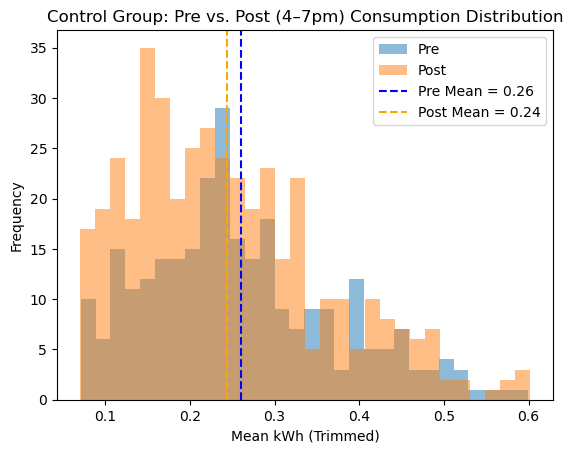

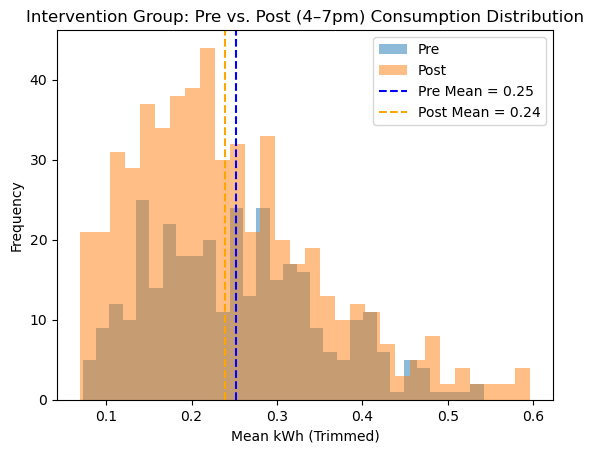

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pivot df_for_did_95 so that Pre/Post become columns
df_95_pivot = df_for_did_95.pivot(
    index=['ANON_ID','Group'],
    columns='Phase',
    values='consumption'
).reset_index()

# Separate out Control vs. Intervention
df_control_95 = df_95_pivot[df_95_pivot['Group'] == 'Control']
df_intervention_95 = df_95_pivot[df_95_pivot['Group'] == 'Intervention']

# Calculate means
control_pre_mean = df_control_95['Pre'].mean()
control_post_mean = df_control_95['Post'].mean()

intervention_pre_mean = df_intervention_95['Pre'].mean()
intervention_post_mean = df_intervention_95['Post'].mean()

# -------------------------------------------------------------------------
# 1) CONTROL GROUP: Overlaid Histograms + Mean Lines
# -------------------------------------------------------------------------
plt.figure()

# Histograms
plt.hist(df_control_95['Pre'].dropna(), bins=30, alpha=0.5, label='Pre')
plt.hist(df_control_95['Post'].dropna(), bins=30, alpha=0.5, label='Post')

# Vertical lines for means
plt.axvline(x=control_pre_mean, color='blue', linestyle='--',
            label=f"Pre Mean = {control_pre_mean:.2f}")
plt.axvline(x=control_post_mean, color='orange', linestyle='--',
            label=f"Post Mean = {control_post_mean:.2f}")

plt.title("Control Group: Pre vs. Post (4–7pm) Consumption Distribution")
plt.xlabel("Mean kWh (Trimmed)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# -------------------------------------------------------------------------
# 2) INTERVENTION GROUP: Overlaid Histograms + Mean Lines
# -------------------------------------------------------------------------
plt.figure()

# Histograms
plt.hist(df_intervention_95['Pre'].dropna(), bins=30, alpha=0.5, label='Pre')
plt.hist(df_intervention_95['Post'].dropna(), bins=30, alpha=0.5, label='Post')

# Vertical lines for means
plt.axvline(x=intervention_pre_mean, color='blue', linestyle='--',
            label=f"Pre Mean = {intervention_pre_mean:.2f}")
plt.axvline(x=intervention_post_mean, color='orange', linestyle='--',
            label=f"Post Mean = {intervention_post_mean:.2f}")

plt.title("Intervention Group: Pre vs. Post (4–7pm) Consumption Distribution")
plt.xlabel("Mean kWh (Trimmed)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


C:\Users\gerva\AppData\Local\Temp\ipykernel_10608\2033075914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control_95['Reduction_%'] = ((df_control_95['Pre'] - df_control_95['Post']) / df_control_95['Pre']) * 100
C:\Users\gerva\AppData\Local\Temp\ipykernel_10608\2033075914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intervention_95['Reduction_%'] = ((df_intervention_95['Pre'] - df_intervention_95['Post']) / df_intervention_95['Pre']) * 100


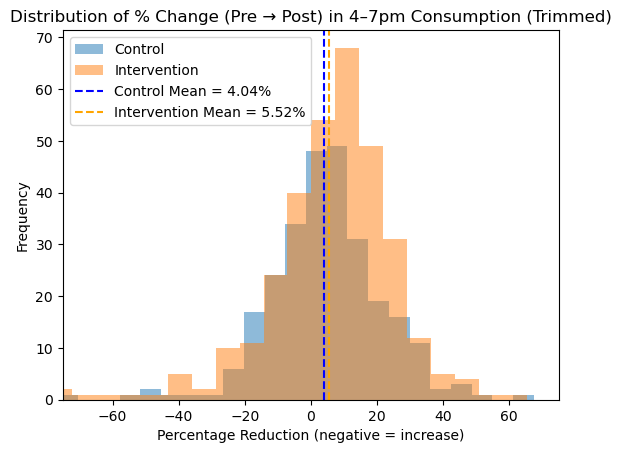

In [20]:
# Create a 'Reduction_%' column in each subset
df_control_95['Reduction_%'] = ((df_control_95['Pre'] - df_control_95['Post']) / df_control_95['Pre']) * 100
df_intervention_95['Reduction_%'] = ((df_intervention_95['Pre'] - df_intervention_95['Post']) / df_intervention_95['Pre']) * 100
control_mean_reduction = df_control_95['Reduction_%'].mean()
intervention_mean_reduction = df_intervention_95['Reduction_%'].mean()

plt.figure()

# Overlay two histograms on the same plot
plt.hist(df_control_95['Reduction_%'].dropna(), bins=30, alpha=0.5, label='Control')
plt.hist(df_intervention_95['Reduction_%'].dropna(), bins=30, alpha=0.5, label='Intervention')

# Means
plt.axvline(x=control_mean_reduction, color='blue', linestyle='--',
            label=f"Control Mean = {control_mean_reduction:.2f}%")
plt.axvline(x=intervention_mean_reduction, color='orange', linestyle='--',
            label=f"Intervention Mean = {intervention_mean_reduction:.2f}%")

plt.title("Distribution of % Change (Pre → Post) in 4–7pm Consumption (Trimmed)")
plt.xlabel("Percentage Reduction (negative = increase)")
plt.ylabel("Frequency")
plt.legend()
plt.xlim(-75,75)

plt.show()


# PENDING: GLM w SocioEconomic Features

In [26]:
df_pivot

Phase,ANON_ID,Group,Post,Pre,Reduction_%,Free_Energy_Bracket
0,00423a851f653d52eaa28ef0d6efea73af2333e8ca4286...,Control,0.261594,NaN,NaN,Not Applicable
1,0045034694b28ba56978092fc4dd601c58774fd74c30b7...,Intervention,0.181874,0.178822,-1.706560,No Reward (< 5%)
2,006d592397024fcb6b2aa8a74193be5f08e71a528cf13d...,Intervention,0.346230,NaN,NaN,No Reward (< 5%)
3,01b422497e7deb1a7c0ad65e11faabdd20dc9da6a4e520...,Control,0.258379,0.221627,-16.583156,Not Applicable
4,01c05e36af0caaf19d6c35e0340d015ab07e742aa14fda...,Intervention,0.263910,0.245933,-7.309892,No Reward (< 5%)
...,...,...,...,...,...,...
1033,fe73ca8cdb323ce3042937f6f519c2a832bdb79b2e2737...,Control,0.210816,NaN,NaN,Not Applicable
1034,fef90b0143496f6e158ba9db416049340d590648659fc6...,Control,0.595371,0.498097,-19.529105,Not Applicable
1035,ffb113db46a42ae5b35d7544a6b168646ca92095ed2766...,Intervention,0.435086,NaN,NaN,No Reward (< 5%)
1036,ffba8412c38b3152abbf790a602f70ccea9313ab717d42...,Intervention,0.365056,0.342903,-6.460275,No Reward (< 5%)


In [34]:
import pandas as pd
import numpy as np

# Group df_combined_pre_post by [ANON_ID, Group, Phase], then compute mean ELEC_KWH.

df_agg = (
    df_combined_pre_post
    .groupby(['ANON_ID','Group','Phase'], as_index=False)
    .agg({'ELEC_KWH':'mean'})
)

# df_agg now has columns:
#   [ANON_ID, Group, Phase, ELEC_KWH]
# one row per ANON_ID-Group-Phase combination,
# with the average consumption for that combination.

# -------------------------------------------------------------------------
# 2) Pivot the grouped data on Phase => separate columns: 'Pre', 'Post'
# -------------------------------------------------------------------------
df_pivot = df_agg.pivot(
    index=['ANON_ID','Group'], 
    columns='Phase', 
    values='ELEC_KWH'
).reset_index()


# -------------------------------------------------------------------------
# 3) Merge with socio-economic data 

df_final = pd.merge(
    df_pivot, 
    socio_df,      
    on='ANON_ID',   
    how='left'      
)

# 4) Compute Delta or Delta_pct
# -------------------------------------------------------------------------
df_final.dropna(subset=['Pre','Post'], inplace=True)

df_final['Delta'] = df_final['Post'] - df_final['Pre']
df_final['Delta_pct'] = (df_final['Post'] - df_final['Pre']) / df_final['Pre']

# Now you can do separate analyses (e.g., regressions) for 
# Control vs. Intervention, or keep them together as you like.

df_control = df_final[df_final['Group'] == 'Control'].copy()
df_intervention = df_final[df_final['Group'] == 'Intervention'].copy()


In [39]:
df_control.head()


,ANON_ID,Group,Post,Pre,AGE_GROUP,INCOME_CATEGORY,HOUSEHOLD_OCCUPANCY,CHILDREN_AT_HOME,HOUSEHOLD_SIZE,NUMBER_OF_BEDROOMS,OCCUPATION,EMPLOYMENT_STATUS,HIGHEST_QUALIFICATION,HOME_OWNERSHIP,HOME_TYPE,HOME_VALUE,SOCIAL_GRADE,TARIFF_GROUP,Delta,Delta_pct
3,01b422497e7deb1a7c0ad65e11faabdd20dc9da6a4e520...,Control,0.258379,0.221627,55-64,"100,000+",Couple Household,0,2,4,Professional,Employed,University Degree or Higher,Owner Occupied,Detached House,500k+,Social grade B,EDF Essentials,0.036753,0.165832
6,029cf457eace7f2a0ed8f55912f926ba9855f3748a117f...,Control,0.194527,0.197656,65-74,"20,000-29,999",Couple Household,0,2,3,Retired,Not Employed,Secondary Education or Less,Owner Occupied,Semi-Detached House,250-500k,Social grade C2,Easy Online,-0.003128,-0.015828
8,034d4493bbb8bd1ae4b7496160610c6a2ab00100a79a7c...,Control,0.462929,0.501322,55-64,"100,000+",Couple Household,0,2,5+,Director/Managerial,Employed,University Degree or Higher,Owner Occupied,Terraced House,500k+,Social grade B,EDF Essentials,-0.038393,-0.076583
9,038dcb89b729d80f4b8308951234739418b5886fd79e28...,Control,0.272890,0.291909,65-74,"20,000-29,999",Couple Household,0,2,3,Retired,Not Employed,Secondary Education or Less,Owner Occupied,Terraced House,0-100k,Social grade C2,EDF Essentials,-0.019020,-0.065156
16,054b88a4807b59fb512c26c563b70b99c62c8624b6628d...,Control,0.075311,0.081028,65-74,"10,000-19,999",Single Adult Household,0,1,2,Retired,Not Employed,A Level Equivalent,Owner Occupied,Flat or Maisonette,0-100k,Social grade C2,EDF Essentials,-0.005718,-0.070563


### Linear regression

In [38]:
# Second part of the GLM
formula_delta = """
Delta ~ C(AGE_GROUP)
      + C(INCOME_CATEGORY)
      + C(HOUSEHOLD_OCCUPANCY)
      + C(CHILDREN_AT_HOME)
      + C(HOUSEHOLD_SIZE)
      + C(NUMBER_OF_BEDROOMS)
      + C(OCCUPATION)
      + C(EMPLOYMENT_STATUS)
      + C(HIGHEST_QUALIFICATION)
      + C(HOME_OWNERSHIP)
      + C(HOME_TYPE)
      + C(HOME_VALUE)
      + C(SOCIAL_GRADE)
      + C(TARIFF_GROUP)
"""

formula_pct = """
Delta_pct ~ C(AGE_GROUP)
          + C(INCOME_CATEGORY)
          + C(HOUSEHOLD_OCCUPANCY)
          + C(CHILDREN_AT_HOME)
          + C(HOUSEHOLD_SIZE)
          + C(NUMBER_OF_BEDROOMS)
          + C(OCCUPATION)
          + C(EMPLOYMENT_STATUS)
          + C(HIGHEST_QUALIFICATION)
          + C(HOME_OWNERSHIP)
          + C(HOME_TYPE)
          + C(HOME_VALUE)
          + C(SOCIAL_GRADE)
          + C(TARIFF_GROUP)
"""

# ------------------------------------------------------------------------------
# 6) Fit regressions: One for Control, one for Intervention, on Delta
# ------------------------------------------------------------------------------
print("=== Control: Delta (Post - Pre) Regression ===")
model_control_delta = smf.ols(formula_delta, data=df_control).fit()
print(model_control_delta.summary())

print("\n=== Intervention: Delta (Post - Pre) Regression ===")
model_intervention_delta = smf.ols(formula_delta, data=df_intervention).fit()
print(model_intervention_delta.summary())

# ------------------------------------------------------------------------------
# 7) Fit regressions: One for Control, one for Intervention, on Delta_pct
# ------------------------------------------------------------------------------
print("\n=== Control: Delta_pct ((Post - Pre)/Pre) Regression ===")
model_control_pct = smf.ols(formula_pct, data=df_control).fit()
print(model_control_pct.summary())

print("\n=== Intervention: Delta_pct ((Post - Pre)/Pre) Regression ===")
model_intervention_pct = smf.ols(formula_pct, data=df_intervention).fit()
print(model_intervention_pct.summary())

=== Control: Delta (Post - Pre) Regression ===
                            OLS Regression Results                            
Dep. Variable:                  Delta   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                 -0.072
Method:                 Least Squares   F-statistic:                    0.6657
Date:                Mon, 24 Mar 2025   Prob (F-statistic):              0.965
Time:                        12:12:46   Log-Likelihood:                 465.68
No. Observations:                 286   AIC:                            -815.4
Df Residuals:                     228   BIC:                            -603.3
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

# Tree based GLM


## All socioeconomic features

### Control

In [42]:
import pandas as pd
import numpy as np

# For splitting data
from sklearn.model_selection import train_test_split

# For pipeline and column transformations
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# The tree-based model (GBM)
from sklearn.ensemble import GradientBoostingRegressor

# -------------------------------------------------------------------------
# 1) Suppose you already have a DataFrame "df" with columns:
#    [AGE_GROUP, INCOME_CATEGORY, ..., Delta] or Delta_pct as the target.
#    Or if you have 'Pre','Post', you can add a column df['Delta'] = df['Post'] - df['Pre'].
# -------------------------------------------------------------------------
# For this example, let's say the target is 'Delta'.
# We'll treat some columns as numeric, others as categorical.

df = df_control

# Identify which columns are categorical vs numeric
categorical_cols = [
    'AGE_GROUP', 'INCOME_CATEGORY', 'HOUSEHOLD_OCCUPANCY',
    'CHILDREN_AT_HOME', 'HOUSEHOLD_SIZE', 'NUMBER_OF_BEDROOMS',
    'OCCUPATION', 'EMPLOYMENT_STATUS', 'HIGHEST_QUALIFICATION',
    'HOME_OWNERSHIP', 'HOME_TYPE', 'HOME_VALUE',
    'SOCIAL_GRADE', 'TARIFF_GROUP'
]
# Suppose you have some numeric columns (none in this example, but in your real data you might).
numeric_cols = []  # e.g. ['some_numeric_column', 'another_numeric']

# We'll use 'Delta' as the target.
target_col = 'Delta'

# Drop any rows missing relevant columns
df = df.dropna(subset=categorical_cols + [target_col]).copy()

# Define X and y
X = df[categorical_cols + numeric_cols]
y = df[target_col]

# -------------------------------------------------------------------------
# 2) Split into train/test (or train/validation)
# -------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -------------------------------------------------------------------------
# 3) Build a pipeline that one-hot encodes the categorical columns
#    and applies a GradientBoostingRegressor.
# -------------------------------------------------------------------------
# ColumnTransformer to handle different data types:
# - OneHotEncoder for categorical
# - (Optional) StandardScaler for numeric if you want
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
numeric_transformer = StandardScaler()

# We'll build a transformer specifying how to process each subset of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)
    ]
)

# Then we pipe that into a tree-based regressor
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('gbm', GradientBoostingRegressor(
        loss='squared_error',   # or 'absolute_error', 'poisson', etc.
        n_estimators=200,       # number of trees
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

# -------------------------------------------------------------------------
# 4) Fit the pipeline on the training set
# -------------------------------------------------------------------------
model.fit(X_train, y_train)

# -------------------------------------------------------------------------
# 5) Evaluate on the test set
# -------------------------------------------------------------------------
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R^2: {r2:.3f}")
print(f"Test RMSE: {rmse:.3f}")

# -------------------------------------------------------------------------
# 6) (Optional) Inspect Feature Importances
# -------------------------------------------------------------------------
# Once fitted, we can retrieve the internal GBM feature importances.
# But note that with one-hot encoding, you'll see many dummy columns 
# instead of the raw feature names. 
# If you'd like a more interpretable approach, consider partial dependence plots.

# We can only retrieve importances from the final estimator:
gbm_model = model.named_steps['gbm']
importances = gbm_model.feature_importances_
print("Raw importances shape:", importances.shape)

# A quick approach to match them back to actual dummy-coded names:
ohe = model.named_steps['preprocess'].transformers_[0][1]
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

feature_names = list(ohe_feature_names)
# if numeric_cols exist, they come after, e.g. feature_names += numeric_cols

# Print out top 10 features by importance (if you want):
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
for fname, imp in feat_imp[:10]:
    print(f"{fname}: {imp:.3f}")


Test R^2: -0.205
Test RMSE: 0.071
Raw importances shape: (58,)
HOME_OWNERSHIP_Private Renting: 0.096
HOME_VALUE_150-250k: 0.062
NUMBER_OF_BEDROOMS_4: 0.060
AGE_GROUP_55-64: 0.059
AGE_GROUP_25-34: 0.056
TARIFF_GROUP_Easy Online: 0.054
SOCIAL_GRADE_Social grade B: 0.049
INCOME_CATEGORY_100,000+: 0.043
INCOME_CATEGORY_75,000-99,999: 0.032
EMPLOYMENT_STATUS_Not Employed: 0.031


### Intervention

In [47]:

df = df_intervention

# Identify which columns are categorical vs numeric
categorical_cols = [
    'AGE_GROUP', 'INCOME_CATEGORY', 'HOUSEHOLD_OCCUPANCY',
    'CHILDREN_AT_HOME', 'HOUSEHOLD_SIZE', 'NUMBER_OF_BEDROOMS',
    'OCCUPATION', 'EMPLOYMENT_STATUS', 'HIGHEST_QUALIFICATION',
    'HOME_OWNERSHIP', 'HOME_TYPE', 'HOME_VALUE',
    'SOCIAL_GRADE', 'TARIFF_GROUP'
]

# Suppose you have some numeric columns (none in this example, but in your real data you might).
numeric_cols = []  # e.g. ['some_numeric_column', 'another_numeric']

# We'll use 'Delta' as the target.
target_col = 'Delta'

# Drop any rows missing relevant columns
df = df.dropna(subset=categorical_cols + [target_col]).copy()

# Define X and y
X = df[categorical_cols + numeric_cols]
y = df[target_col]

# -------------------------------------------------------------------------
# 2) Split into train/test (or train/validation)
# -------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# 3) Build a pipeline that one-hot encodes the categorical columns
#    and applies a GradientBoostingRegressor.

categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
numeric_transformer = StandardScaler()

# We'll build a transformer specifying how to process each subset of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)
    ]
)

# Then we pipe that into a tree-based regressor
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('gbm', GradientBoostingRegressor(
        loss='squared_error',   # or 'absolute_error', 'poisson', etc.
        n_estimators=200,       # number of trees
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

# -------------------------------------------------------------------------
# 4) Fit the pipeline on the training set
# -------------------------------------------------------------------------
model.fit(X_train, y_train)

# -------------------------------------------------------------------------
# 5) Evaluate on the test set
# -------------------------------------------------------------------------
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R^2: {r2:.3f}")
print(f"Test RMSE: {rmse:.3f}")

# -------------------------------------------------------------------------
# 6) (Optional) Inspect Feature Importances
# -------------------------------------------------------------------------
# Once fitted, we can retrieve the internal GBM feature importances.
# But note that with one-hot encoding, you'll see many dummy columns 
# instead of the raw feature names. 
# If you'd like a more interpretable approach, consider partial dependence plots.

# We can only retrieve importances from the final estimator:
gbm_model = model.named_steps['gbm']
importances = gbm_model.feature_importances_
print("Raw importances shape:", importances.shape)

# A quick approach to match them back to actual dummy-coded names:
ohe = model.named_steps['preprocess'].transformers_[0][1]
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

feature_names = list(ohe_feature_names)
# if numeric_cols exist, they come after, e.g. feature_names += numeric_cols

# Print out top 10 features by importance (if you want):
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
for fname, imp in feat_imp[:10]:
    print(f"{fname}: {imp:.3f}")


Test R^2: -1.241
Test RMSE: 0.081
Raw importances shape: (57,)
OCCUPATION_Student: 0.137
TARIFF_GROUP_Standard: 0.104
NUMBER_OF_BEDROOMS_4: 0.079
INCOME_CATEGORY_75,000-99,999: 0.068
HOUSEHOLD_SIZE_3-4: 0.052
TARIFF_GROUP_EDF Essentials: 0.047
HOUSEHOLD_OCCUPANCY_Single Adult Household: 0.041
CHILDREN_AT_HOME_2+: 0.037
SOCIAL_GRADE_Social grade C1: 0.033
OCCUPATION_Professional: 0.025


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [13] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Some socioeconomic variables

In [46]:
import pandas as pd
import numpy as np

# For splitting data
from sklearn.model_selection import train_test_split

# For pipeline and column transformations
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# The tree-based model (GBM)
from sklearn.ensemble import GradientBoostingRegressor

# -------------------------------------------------------------------------
# 1) Suppose you already have a DataFrame "df" with columns:
#    [AGE_GROUP, INCOME_CATEGORY, ..., Delta] or Delta_pct as the target.
#    Or if you have 'Pre','Post', you can add a column df['Delta'] = df['Post'] - df['Pre'].
# -------------------------------------------------------------------------
# For this example, let's say the target is 'Delta'.
# We'll treat some columns as numeric, others as categorical.

df = df_intervention

# Identify which columns are categorical vs numeric
categorical_cols = [
    'AGE_GROUP', 'INCOME_CATEGORY', 'HOUSEHOLD_OCCUPANCY'
]
'''
    ,
    'CHILDREN_AT_HOME', 'HOUSEHOLD_SIZE', 'NUMBER_OF_BEDROOMS',
    'OCCUPATION', 'EMPLOYMENT_STATUS', 'HIGHEST_QUALIFICATION',
    'HOME_OWNERSHIP', 'HOME_TYPE', 'HOME_VALUE',
    'SOCIAL_GRADE', 'TARIFF_GROUP'
]
'''
# Suppose you have some numeric columns (none in this example, but in your real data you might).
numeric_cols = []  # e.g. ['some_numeric_column', 'another_numeric']

# We'll use 'Delta' as the target.
target_col = 'Delta'

# Drop any rows missing relevant columns
df = df.dropna(subset=categorical_cols + [target_col]).copy()

# Define X and y
X = df[categorical_cols + numeric_cols]
y = df[target_col]

# -------------------------------------------------------------------------
# 2) Split into train/test (or train/validation)
# -------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -------------------------------------------------------------------------
# 3) Build a pipeline that one-hot encodes the categorical columns
#    and applies a GradientBoostingRegressor.
# -------------------------------------------------------------------------
# ColumnTransformer to handle different data types:
# - OneHotEncoder for categorical
# - (Optional) StandardScaler for numeric if you want
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
numeric_transformer = StandardScaler()

# We'll build a transformer specifying how to process each subset of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)
    ]
)

# Then we pipe that into a tree-based regressor
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('gbm', GradientBoostingRegressor(
        loss='squared_error',   # or 'absolute_error', 'poisson', etc.
        n_estimators=200,       # number of trees
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

# -------------------------------------------------------------------------
# 4) Fit the pipeline on the training set
# -------------------------------------------------------------------------
model.fit(X_train, y_train)

# -------------------------------------------------------------------------
# 5) Evaluate on the test set
# -------------------------------------------------------------------------
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R^2: {r2:.3f}")
print(f"Test RMSE: {rmse:.3f}")

# -------------------------------------------------------------------------
# 6) (Optional) Inspect Feature Importances
# -------------------------------------------------------------------------
# Once fitted, we can retrieve the internal GBM feature importances.
# But note that with one-hot encoding, you'll see many dummy columns 
# instead of the raw feature names. 
# If you'd like a more interpretable approach, consider partial dependence plots.

# We can only retrieve importances from the final estimator:
gbm_model = model.named_steps['gbm']
importances = gbm_model.feature_importances_
print("Raw importances shape:", importances.shape)

# A quick approach to match them back to actual dummy-coded names:
ohe = model.named_steps['preprocess'].transformers_[0][1]
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

feature_names = list(ohe_feature_names)
# if numeric_cols exist, they come after, e.g. feature_names += numeric_cols

# Print out top 10 features by importance (if you want):
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
for fname, imp in feat_imp[:10]:
    print(f"{fname}: {imp:.3f}")


Test R^2: -0.170
Test RMSE: 0.059
Raw importances shape: (15,)
HOUSEHOLD_OCCUPANCY_Single Adult Household: 0.403
AGE_GROUP_65-74: 0.171
INCOME_CATEGORY_10,000-19,999: 0.064
INCOME_CATEGORY_30,000-39,999: 0.059
AGE_GROUP_25-34: 0.056
INCOME_CATEGORY_40,000-49,999: 0.048
INCOME_CATEGORY_100,000+: 0.039
INCOME_CATEGORY_50,000-74,999: 0.032
AGE_GROUP_35-44: 0.030
INCOME_CATEGORY_75,000-99,999: 0.028


# Based on poor results, we think its appropiate to do feature engineering

# Feature Engineering Summary

| Original Column          | Feature Engineering Approach                                               | New Column / Encoding             |
|--------------------------|----------------------------------------------------------------------------|-----------------------------------|
| `AGE_GROUP`              | Replaced each age bracket with its midpoint (e.g. '18-24' → 21, '75+' → 80)| `AGE_GROUP_num`                   |
| `INCOME_CATEGORY`        | Mapped each income bracket to a midpoint (e.g. '10,000-19,999' → 15,000)    | `INCOME_CATEGORY_num`             |
| `HOUSEHOLD_OCCUPANCY`    | Converted occupancy type to integer codes (Single →1, Couple →2, Multi →3) | `HOUSEHOLD_OCCUPANCY_num`         |
| `CHILDREN_AT_HOME`       | '0' → 0, '1' → 1, '2+' → 2                                                 | `CHILDREN_AT_HOME_num`            |
| `HOUSEHOLD_SIZE`         | '1' → 1, '2' → 2, '3-4' → 3.5, '5+' → 5                                     | `HOUSEHOLD_SIZE_num`              |
| `NUMBER_OF_BEDROOMS`     | '1' → 1, '2' → 2, '3' → 3, '4' → 4, '5+' → 5                                | `NUMBER_OF_BEDROOMS_num`          |
| `HIGHEST_QUALIFICATION`  | Ordinal encoding (e.g. 0 = Secondary or Less, 3 = University Degree)        | `HIGHEST_QUALIFICATION_num`       |
| `HOME_VALUE`             | Mapped each bracket to a midpoint (e.g. '100-150k' → 125,000)              | `HOME_VALUE_num`                  |
| `SOCIAL_GRADE`           | Assigned numeric ranks (A →1, B →2, C1 →3, C2 →4, D →5)                     | `SOCIAL_GRADE_num`                |
| `TARIFF_GROUP`           | **Left as categorical** (unchanged / no numeric encoding)                  | N/A                               |



In [50]:
import pandas as pd
import os

print(f"Socio-economic data shape before cleaning: {socio_df.shape}")

# -------------------------------------------------------------------------
# 1) Example: Numeric Mapping Dictionaries
# -------------------------------------------------------------------------
# Age group midpoints
age_map = {
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65-74': 69.5,
    '75+': 80   # arbitrary guess for 75+
}

# Income brackets (midpoints in thousands, e.g. "10,000-19,999" -> 15k).
income_map = {
    '0-9,999': 5_000,
    '10,000-19,999': 15_000,
    '20,000-29,999': 25_000,
    '30,000-39,999': 35_000,
    '40,000-49,999': 45_000,
    '50,000-74,999': 62_500,
    '75,000-99,999': 87_500,
    '100,000+': 150_000   # or 150_000, your choice for open-ended
}

# Household occupancy: Single=1, Couple=2, Multi=3
household_occupancy_map = {
    'Single Adult Household': 1,
    'Couple Household': 2,
    'Multi-Occupancy Household': 3
}

# Children: '2+' -> 2 or 3. We'll pick 2 to keep it simple
children_map = {
    '0': 0,
    '1': 1,
    '2+': 2
}

# Household size: '3-4' -> 3.5 or 4. We'll pick 3.5
household_size_map = {
    '1': 1,
    '2': 2,
    '3-4': 3.5,
    '5+': 5
}

# Number of bedrooms: '5+' -> 5
bedrooms_map = {
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5+': 5
}

# Highest qualification (ordinal ranks):
# e.g. 0='Secondary or less', 1='GCSE', 2='A Level', 3='Uni Degree'
qualification_map = {
    'Secondary Education or Less': 0,
    'GCSE Equivalent': 1,
    'A Level Equivalent': 2,
    'University Degree or Higher': 3
}

# Home value midpoints (in, say, thousands or raw integers?). We'll pick integers:
home_value_map = {
    '0-100k': 50_000,
    '100-150k': 125_000,
    '150-250k': 200_000,
    '250-500k': 375_000,
    '500k+': 500_000
}

# Social grade (rough ordinal from A to D)
# E.g. A=1, B=2, C1=3, C2=4, D=5
social_grade_map = {
    'Social grade A': 1,
    'Social grade B': 2,
    'Social grade C1': 3,
    'Social grade C2': 4,
    'Social grade D': 5
}
'''
# Occupation, Employment, Home Ownership, Home Type, Tariff Group
# are typically nominal, no numeric range. You can assign arbitrary integers:
# (This is optional if you prefer one-hot encoding or if there's no natural order.)
occupation_map = {
    # Example arbitrary codes for demonstration
    'Director/Managerial': 1,
    'Looking after home': 2,
    'Office Worker': 3,
    'Professional': 4,
    'Retired': 5,
    'Service Sector': 6,
    'Skilled Manual Worker': 7,
    'Student': 8,
    'Unemployed': 9
}
employment_map = {
    'Employed': 1,
    'Not Employed': 0
}
home_ownership_map = {
    'Owner Occupied': 1,
    'Private Renting': 2,
    'Social Renting': 3
}
home_type_map = {
    'Detached House': 1,
    'Flat or Maisonette': 2,
    'Semi-Detached House': 3,
    'Terraced House': 4
}
tariff_map = {
    'Deemed': 1,
    'EDF Essentials': 2,
    'Easy Online': 3,
    'Engage': 4,
    'Essentials Exclusive': 5,
    'Fix Total Service': 6,
    'Goelectric': 7,
    'Goelectric Exclusive': 8,
    'Safeguard Assist': 9,
    'Simply Online': 10,
    'Standard': 11,
    'Total Service': 12
}
'''
# 2) Apply the mappings to create numeric columns

socio_df_mapped = socio_df
socio_df_mapped['AGE_GROUP_num'] = socio_df_mapped['AGE_GROUP'].map(age_map)
socio_df_mapped['INCOME_CATEGORY_num'] = socio_df_mapped['INCOME_CATEGORY'].map(income_map)
socio_df_mapped['HOUSEHOLD_OCCUPANCY_num'] = socio_df_mapped['HOUSEHOLD_OCCUPANCY'].map(household_occupancy_map)
socio_df_mapped['CHILDREN_AT_HOME_num'] = socio_df_mapped['CHILDREN_AT_HOME'].map(children_map)
socio_df_mapped['HOUSEHOLD_SIZE_num'] = socio_df_mapped['HOUSEHOLD_SIZE'].map(household_size_map)
socio_df_mapped['NUMBER_OF_BEDROOMS_num'] = socio_df_mapped['NUMBER_OF_BEDROOMS'].map(bedrooms_map)
socio_df_mapped['HIGHEST_QUALIFICATION_num'] = socio_df_mapped['HIGHEST_QUALIFICATION'].map(qualification_map)
socio_df_mapped['HOME_VALUE_num'] = socio_df_mapped['HOME_VALUE'].map(home_value_map)
socio_df_mapped['SOCIAL_GRADE_num'] = socio_df_mapped['SOCIAL_GRADE'].map(social_grade_map)
'''
socio_df['OCCUPATION_num'] = socio_df['OCCUPATION'].map(occupation_map)
socio_df['EMPLOYMENT_STATUS_num'] = socio_df['EMPLOYMENT_STATUS'].map(employment_map)
socio_df['HOME_OWNERSHIP_num'] = socio_df['HOME_OWNERSHIP'].map(home_ownership_map)
socio_df['HOME_TYPE_num'] = socio_df['HOME_TYPE'].map(home_type_map)
socio_df['TARIFF_GROUP_num'] = socio_df['TARIFF_GROUP'].map(tariff_map)
'''

# 3) (Optional) Inspect your new numeric columns
# -------------------------------------------------------------------------
print(socio_df_mapped[['AGE_GROUP','AGE_GROUP_num','INCOME_CATEGORY','INCOME_CATEGORY_num']].head(10))


Socio-economic data shape before cleaning: (1044, 15)
  AGE_GROUP AGE_GROUP_num INCOME_CATEGORY INCOME_CATEGORY_num
0     35-44          39.5   50,000-74,999               62500
1     65-74          69.5   30,000-39,999               35000
2     55-64          59.5         0-9,999                5000
3       75+          80.0   20,000-29,999               25000
4     55-64          59.5        100,000+              150000
5       75+          80.0   30,000-39,999               35000
6     65-74          69.5   20,000-29,999               25000
7     65-74          69.5   40,000-49,999               45000
8     65-74          69.5   20,000-29,999               25000
9     18-24          21.0   75,000-99,999               87500


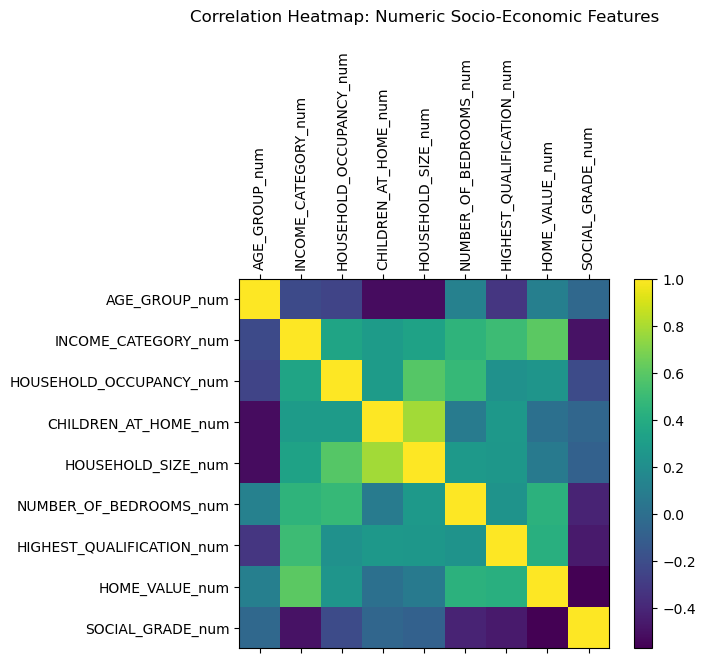

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Identify the numeric columns you want to include
numeric_cols = [
    'AGE_GROUP_num',
    'INCOME_CATEGORY_num',
    'HOUSEHOLD_OCCUPANCY_num',
    'CHILDREN_AT_HOME_num',
    'HOUSEHOLD_SIZE_num',
    'NUMBER_OF_BEDROOMS_num',
    'HIGHEST_QUALIFICATION_num',
    'HOME_VALUE_num',
    'SOCIAL_GRADE_num'
    # Add more if you have them, e.g. 'OCCUPATION_num', etc.
]

# 2) Filter to those columns in your mapped DataFrame
df_numeric = socio_df_mapped[numeric_cols].copy()

# 3) Compute the correlation matrix
corr_matrix = df_numeric.corr()

# 4) Plot the heatmap using matplotlib
plt.figure()
plt.matshow(corr_matrix, fignum=0)  # 'fignum=0' re-uses the same figure or you can omit it
plt.title("Correlation Heatmap: Numeric Socio-Economic Features", pad=20)

# 5) Customize axes ticks
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)

# 6) Add a colorbar to show correlation scale
plt.colorbar()

plt.show()


#### Now that we have "better" features, lets try GLM

In [68]:
import pandas as pd


old_categorical_cols = [
    'AGE_GROUP',
    'INCOME_CATEGORY',
    'HOUSEHOLD_OCCUPANCY',
    'CHILDREN_AT_HOME',
    'HOUSEHOLD_SIZE',
    'NUMBER_OF_BEDROOMS',
    'OCCUPATION',
    'EMPLOYMENT_STATUS',
    'HIGHEST_QUALIFICATION',
    'HOME_OWNERSHIP',
    'HOME_TYPE',
    'HOME_VALUE',
    'SOCIAL_GRADE',
    # 'TARIFF_GROUP'
]

new_numeric_cols = [
    'AGE_GROUP_num',
    'INCOME_CATEGORY_num',
    'HOUSEHOLD_OCCUPANCY_num',
    'CHILDREN_AT_HOME_num',
    'HOUSEHOLD_SIZE_num',
    'NUMBER_OF_BEDROOMS_num',
    'HIGHEST_QUALIFICATION_num',
    'HOME_VALUE_num',
    'SOCIAL_GRADE_num',
    # 
]


df_control_merged = pd.merge(
    df_control, 
    socio_df_mapped[['ANON_ID'] + new_numeric_cols],  # keep only the ID + numeric cols
    on='ANON_ID', 
    how='inner'
)

# Drop the old categorical columns that have now been replaced
df_control_merged.drop(columns=old_categorical_cols, inplace=True, errors='ignore')

print("[INFO] Control merged shape:", df_control_merged.shape)
print(df_control_merged.columns)

df_intervention_merged = pd.merge(
    df_intervention,
    socio_df_mapped[['ANON_ID'] + new_numeric_cols],
    on='ANON_ID',
    how='inner'
)

df_intervention_merged.drop(columns=old_categorical_cols, inplace=True, errors='ignore')

print("[INFO] Intervention merged shape:", df_intervention_merged.shape)
print(df_intervention_merged.columns)



[INFO] Control merged shape: (286, 16)
Index(['ANON_ID', 'Group', 'Post', 'Pre', 'TARIFF_GROUP', 'Delta', 'Delta_pct',
       'AGE_GROUP_num', 'INCOME_CATEGORY_num', 'HOUSEHOLD_OCCUPANCY_num',
       'CHILDREN_AT_HOME_num', 'HOUSEHOLD_SIZE_num', 'NUMBER_OF_BEDROOMS_num',
       'HIGHEST_QUALIFICATION_num', 'HOME_VALUE_num', 'SOCIAL_GRADE_num'],
      dtype='object')
[INFO] Intervention merged shape: (342, 16)
Index(['ANON_ID', 'Group', 'Post', 'Pre', 'TARIFF_GROUP', 'Delta', 'Delta_pct',
       'AGE_GROUP_num', 'INCOME_CATEGORY_num', 'HOUSEHOLD_OCCUPANCY_num',
       'CHILDREN_AT_HOME_num', 'HOUSEHOLD_SIZE_num', 'NUMBER_OF_BEDROOMS_num',
       'HIGHEST_QUALIFICATION_num', 'HOME_VALUE_num', 'SOCIAL_GRADE_num'],
      dtype='object')


In [69]:
print(df_control_merged.shape)
print(df_control.shape)

(286, 16)
(286, 20)


In [70]:
print(df_intervention_merged.shape)
print(df_intervention.shape)

(342, 16)
(342, 20)


In [65]:
df_intervention_merged.head()


,ANON_ID,Group,Post,Pre,Delta,Delta_pct,AGE_GROUP_num,INCOME_CATEGORY_num,HOUSEHOLD_OCCUPANCY_num,CHILDREN_AT_HOME_num,HOUSEHOLD_SIZE_num,NUMBER_OF_BEDROOMS_num,HIGHEST_QUALIFICATION_num,HOME_VALUE_num,SOCIAL_GRADE_num
0,0045034694b28ba56978092fc4dd601c58774fd74c30b7...,Intervention,0.181874,0.178822,0.003052,0.017066,69.5,45000,2,0,2.0,4,2,200000,4
1,01c05e36af0caaf19d6c35e0340d015ab07e742aa14fda...,Intervention,0.263910,0.245933,0.017977,0.073099,59.5,62500,1,0,1.0,1,3,200000,3
2,03edaa0ab8ac6da0cf0a3c4f9e7bd6e65ba4bd4dec3ee3...,Intervention,0.077191,0.102109,-0.024918,-0.244030,59.5,25000,2,0,2.0,3,1,125000,5
3,04ef482b455c0a46fd1d52a1a4cc8a11cb89424035d2f2...,Intervention,0.306281,0.309915,-0.003634,-0.011726,59.5,87500,2,1,2.0,4,3,375000,2
4,04fef70b0ec49afb0cbcddbaaef57a679c2d4dcd754c5f...,Intervention,0.349290,0.373171,-0.023881,-0.063994,59.5,25000,2,0,2.0,3,1,375000,3


In [74]:


import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Example usage:
df = df_intervention_merged.copy()

categorical_cols = ['TARIFF_GROUP']
numeric_cols = [
    'AGE_GROUP_num',
    'INCOME_CATEGORY_num',
    'HOUSEHOLD_OCCUPANCY_num',
    'CHILDREN_AT_HOME_num',
    'HOUSEHOLD_SIZE_num',
    'NUMBER_OF_BEDROOMS_num',
    'HIGHEST_QUALIFICATION_num',
    'HOME_VALUE_num',
    'SOCIAL_GRADE_num'
]

target_col = 'Delta'

# Drop rows missing relevant columns
df = df.dropna(subset=categorical_cols + [target_col])

X = df[categorical_cols + numeric_cols]
y = df[target_col]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Define transformations
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)
    ]
)

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('gbm', GradientBoostingRegressor(
        loss='squared_error',
        n_estimators=200,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R^2: {r2:.3f}")
print(f"Test RMSE: {rmse:.3f}")

# Feature importances
gbm_model = model.named_steps['gbm']
importances = gbm_model.feature_importances_

ohe = model.named_steps['preprocess'].transformers_[0][1]
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

feature_names = list(ohe_feature_names)
feature_names += numeric_cols  # append numeric columns

feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
for fname, imp in feat_imp[:10]:
    print(f"{fname}: {imp:.3f}")


Test R^2: -0.507
Test RMSE: 0.066
AGE_GROUP_num: 0.273
HOUSEHOLD_SIZE_num: 0.194
INCOME_CATEGORY_num: 0.094
TARIFF_GROUP_EDF Essentials: 0.086
NUMBER_OF_BEDROOMS_num: 0.061
HOME_VALUE_num: 0.057
CHILDREN_AT_HOME_num: 0.054
HIGHEST_QUALIFICATION_num: 0.044
TARIFF_GROUP_Standard: 0.041
SOCIAL_GRADE_num: 0.034


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [73]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Example usage:
df = df_control_merged.copy()

categorical_cols = ['TARIFF_GROUP']
numeric_cols = [
    'AGE_GROUP_num',
    'INCOME_CATEGORY_num',
    'HOUSEHOLD_OCCUPANCY_num',
    'CHILDREN_AT_HOME_num',
    'HOUSEHOLD_SIZE_num',
    'NUMBER_OF_BEDROOMS_num',
    'HIGHEST_QUALIFICATION_num',
    'HOME_VALUE_num',
    'SOCIAL_GRADE_num'
]

target_col = 'Delta'

# Drop rows missing relevant columns
df = df.dropna(subset=categorical_cols + [target_col])

X = df[categorical_cols + numeric_cols]
y = df[target_col]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Define transformations
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)
    ]
)

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('gbm', GradientBoostingRegressor(
        loss='squared_error',
        n_estimators=200,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R^2: {r2:.3f}")
print(f"Test RMSE: {rmse:.3f}")

# Feature importances
gbm_model = model.named_steps['gbm']
importances = gbm_model.feature_importances_

ohe = model.named_steps['preprocess'].transformers_[0][1]
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

feature_names = list(ohe_feature_names)
feature_names += numeric_cols  # append numeric columns

feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
for fname, imp in feat_imp[:10]:
    print(f"{fname}: {imp:.3f}")


Test R^2: -0.148
Test RMSE: 0.069
INCOME_CATEGORY_num: 0.168
AGE_GROUP_num: 0.132
NUMBER_OF_BEDROOMS_num: 0.123
SOCIAL_GRADE_num: 0.119
HOME_VALUE_num: 0.096
CHILDREN_AT_HOME_num: 0.090
TARIFF_GROUP_Easy Online: 0.075
HOUSEHOLD_SIZE_num: 0.068
HIGHEST_QUALIFICATION_num: 0.048
TARIFF_GROUP_Standard: 0.032


# Function to generate plots

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from scipy.stats import ttest_rel, wilcoxon  # for paired Mann-Whitney is "wilcoxon" in SciPy

def generate_intervention_analysis(
        include_time_of_day_start=0,
        include_time_of_day_end=24,
        exclude_time_of_day_start=None,
        exclude_time_of_day_end=None,
        pre_start=pd.Timestamp("2023-02-01 00:00:00"),
        pre_end=pd.Timestamp("2024-01-31 23:59:59"),
        post_start=pd.Timestamp("2024-04-01 00:00:00"),
        post_end=pd.Timestamp("2024-12-31 23:59:59"),
        lower_end_consumption=2.5,
        higher_end_consumption=97.5,
        file_path=r"C:\Users\gerva\OneDrive\Documentos\GitHub\ST498_CAPSTONE\FLASH\toShare"
    ):
    """
    Studies whether the Intervention group's Post usage < Pre usage, using:
      - Paired T-test
      - Paired Mann-Whitney (Wilcoxon signed-rank)
    Also plots distributions for reference. We optionally exclude a subrange
    from the daily hours (e.g., exclude 16–19 but keep the rest).

    Steps:
      1) Read & label CSVs for (Control & Intervention) x (Pre & Post).
      2) Filter hours in [include_time_of_day_start, include_time_of_day_end),
         then exclude [exclude_time_of_day_start, exclude_time_of_day_end) if provided.
      3) Pivot so each row has (Pre, Post), then compute %Change.
      4) Trims outliers in Pre & Post.
      5) Plots:
         - Control: Pre vs. Post
         - Intervention: Pre vs. Post
         - Distribution of %Change
      6) For the Intervention group, do:
         (A) Paired T-test: H0 => mean(Post)=mean(Pre), H1 => Post<Pre
         (B) Paired Mann-Whitney (Wilcoxon) test: same hypothesis.

    Returns
    -------
    None
        Displays plots and prints test results.
    """

    from scipy.stats import ttest_rel, wilcoxon

    def preprocess_and_aggregate(file_name, start_date, end_date):
        df = pd.read_csv(os.path.join(file_path, file_name))
        df = df.rename(columns={'Unnamed: 0': 'Time'})
        df['Time'] = pd.to_datetime(df['Time'], format="%Y-%m-%d %H:%M:%S")

        # Filter by date
        df = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)]

        # Keep hours in [include_time_of_day_start, include_time_of_day_end)
        df = df[
            (df['Time'].dt.hour >= include_time_of_day_start) &
            (df['Time'].dt.hour < include_time_of_day_end)
        ]

        # Exclude subrange if specified
        if exclude_time_of_day_start is not None and exclude_time_of_day_end is not None:
            df = df[~(
                (df['Time'].dt.hour >= exclude_time_of_day_start) &
                (df['Time'].dt.hour < exclude_time_of_day_end)
            )]

        # Melt and average
        df_long = df.melt(id_vars=['Time'], var_name='ANON_ID', value_name='ELEC_KWH')
        df_long.drop_duplicates(subset=['Time','ANON_ID'], inplace=True)
        df_agg = df_long.groupby('ANON_ID', as_index=False)['ELEC_KWH'].mean()
        return df_agg

    # 1) Read data
    df_control_pre  = preprocess_and_aggregate("controlePreConsolide.csv", pre_start, pre_end)
    df_control_post = preprocess_and_aggregate("controleConsolide.csv",    post_start, post_end)

    df_intervention_pre  = preprocess_and_aggregate("interventionPreConsolide.csv", pre_start, pre_end)
    df_intervention_post = preprocess_and_aggregate("interventionConsolide.csv",    post_start, post_end)

    df_control_pre['Group'] = 'Control';      df_control_pre['Phase'] = 'Pre'
    df_control_post['Group']= 'Control';      df_control_post['Phase']= 'Post'
    df_intervention_pre['Group']   = 'Intervention'; df_intervention_pre['Phase']   = 'Pre'
    df_intervention_post['Group']  = 'Intervention'; df_intervention_post['Phase']  = 'Post'

    df_combined = pd.concat([
        df_control_pre, df_control_post,
        df_intervention_pre, df_intervention_post
    ], ignore_index=True)

    # 2) pivot => Pre / Post
    df_mean = (df_combined
               .groupby(['ANON_ID','Group','Phase'], as_index=False)
               .agg({'ELEC_KWH':'mean'}))

    df_pivot = df_mean.pivot(index=['ANON_ID','Group'], columns='Phase', values='ELEC_KWH').reset_index()
    df_pivot.dropna(subset=['Pre','Post'], inplace=True)

    # 3) compute %Change
    df_pivot['Reduction_%'] = ((df_pivot['Pre'] - df_pivot['Post']) / df_pivot['Pre']) * 100

    # 4) outlier trimming
    pre_lower = np.percentile(df_pivot['Pre'],  lower_end_consumption)
    pre_upper = np.percentile(df_pivot['Pre'],  higher_end_consumption)
    post_lower = np.percentile(df_pivot['Post'], lower_end_consumption)
    post_upper = np.percentile(df_pivot['Post'], higher_end_consumption)

    df_pivot_trim = df_pivot[
        (df_pivot['Pre']  >= pre_lower)  & (df_pivot['Pre']  <= pre_upper) &
        (df_pivot['Post'] >= post_lower) & (df_pivot['Post'] <= post_upper)
    ].copy()

    df_control = df_pivot_trim[df_pivot_trim['Group'] == 'Control'].copy()
    df_intervention = df_pivot_trim[df_pivot_trim['Group'] == 'Intervention'].copy()

    control_pre_mean = df_control['Pre'].mean() if len(df_control)>0 else np.nan
    control_post_mean= df_control['Post'].mean() if len(df_control)>0 else np.nan
    intr_pre_mean    = df_intervention['Pre'].mean() if len(df_intervention)>0 else np.nan
    intr_post_mean   = df_intervention['Post'].mean()if len(df_intervention)>0 else np.nan

    # Plot: Control Pre vs. Post
    plt.figure()
    if len(df_control)>0:
        plt.hist(df_control['Pre'], bins=30, alpha=0.5, label='Pre')
        plt.hist(df_control['Post'], bins=30, alpha=0.5, label='Post')
        plt.axvline(control_pre_mean, color='blue', linestyle='--', label=f"Pre Mean={control_pre_mean:.3f}")
        plt.axvline(control_post_mean,color='red',  linestyle='--', label=f"Post Mean={control_post_mean:.3f}")
    plt.title("Control: Pre vs Post Distribution")
    plt.xlabel("Mean kWh")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Plot: Intervention Pre vs. Post
    plt.figure()
    if len(df_intervention)>0:
        plt.hist(df_intervention['Pre'], bins=30, alpha=0.5, label='Pre')
        plt.hist(df_intervention['Post'], bins=30, alpha=0.5, label='Post')
        plt.axvline(intr_pre_mean,  color='blue', linestyle='--', label=f"Pre Mean={intr_pre_mean:.3f}")
        plt.axvline(intr_post_mean, color='red',  linestyle='--', label=f"Post Mean={intr_post_mean:.3f}")
    plt.title("Intervention: Pre vs Post Distribution")
    plt.xlabel("Mean kWh")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Plot: %Change Distribution (Control vs. Intervention)
    plt.figure()
    if len(df_control)>0:
        ctrl_mean_red = df_control['Reduction_%'].mean()
        plt.hist(df_control['Reduction_%'].dropna(), bins=30, alpha=0.5, label='Control')
        plt.axvline(ctrl_mean_red, color='blue', linestyle='--', label=f"Ctrl Mean={ctrl_mean_red:.2f}%")
    if len(df_intervention)>0:
        intr_mean_red = df_intervention['Reduction_%'].mean()
        plt.hist(df_intervention['Reduction_%'].dropna(), bins=30, alpha=0.5, label='Intervention')
        plt.axvline(intr_mean_red, color='orange', linestyle='--', label=f"Intr Mean={intr_mean_red:.2f}%")
    plt.title("Distribution of %Change (Pre→Post)")
    plt.xlabel("Percentage Reduction (negative=consumption increase)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Paired T-test + Mann-Whitney (Wilcoxon) for Intervention
    if len(df_intervention)<2:
        print("[WARN] Not enough data in Intervention for a paired test.")
        return

    df_in = df_intervention.dropna(subset=['Pre','Post']).copy()
    df_in['diff'] = df_in['Post'] - df_in['Pre']
    mean_diff = df_in['diff'].mean()

    # (A) Paired T-test
    t_stat, p_val_two_sided = ttest_rel(df_in['Post'], df_in['Pre'])
    if mean_diff < 0:
        p_val_one_sided = p_val_two_sided/2
    else:
        p_val_one_sided = 1 - p_val_two_sided/2

    print("\n=== Paired T-test (Intervention): H0 => Post=Pre, H1 => Post<Pre ===")
    print(f"Mean diff=Post-Pre => {mean_diff:.4f}, t_stat={t_stat:.4f}, two-sided p={p_val_two_sided:.6f}, one-sided p={p_val_one_sided:.6f}")

    alpha=0.05
    if p_val_one_sided < alpha and mean_diff<0:
        print("Conclusion (T-test): REJECT H0 => Intervention's Post usage < Pre usage.")
    else:
        print("Conclusion (T-test): CANNOT reject H0 => No evidence that Post < Pre.")

    # (B) Wilcoxon signed-rank test (paired Mann-Whitney)
    # We do a two-sided approach then interpret one-sided similarly
    # SciPy's wilcoxon default is two-sided
    # If mean_diff < 0 => one-sided p = p_two_sided/2, else 1 - p_two_sided/2
    # Note: if data has < 20 non-zero differences, might get a warning about "exact p-value not implemented"

    w_stat, p_val_two_sided_wilcoxon = wilcoxon(df_in['Post'], df_in['Pre'])
    if mean_diff < 0:
        p_val_one_sided_w = p_val_two_sided_wilcoxon/2
    else:
        p_val_one_sided_w = 1 - (p_val_two_sided_wilcoxon/2)

    print("\n=== Wilcoxon signed-rank (Intervention): H0 => Post=Pre, H1 => Post<Pre ===")
    print(f"W-stat={w_stat:.4f}, two-sided p={p_val_two_sided_wilcoxon:.6f}, one-sided p={p_val_one_sided_w:.6f}")

    if p_val_one_sided_w < alpha and mean_diff<0:
        print("Conclusion (Wilcoxon): REJECT H0 => Intervention's Post usage < Pre usage.")
    else:
        print("Conclusion (Wilcoxon): CANNOT reject H0 => No evidence that Post < Pre.")


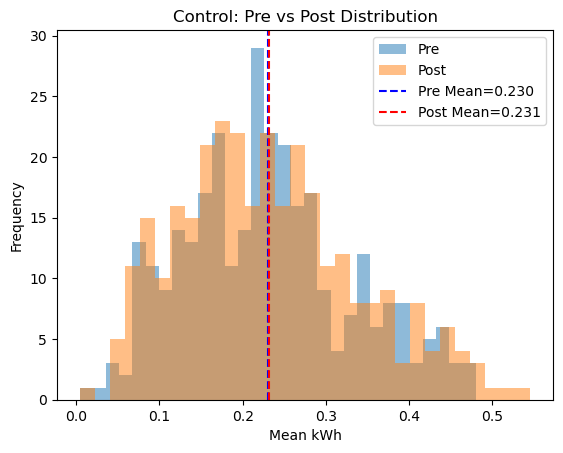

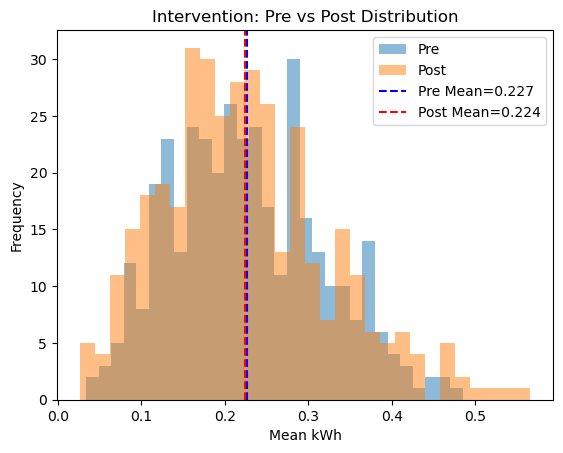

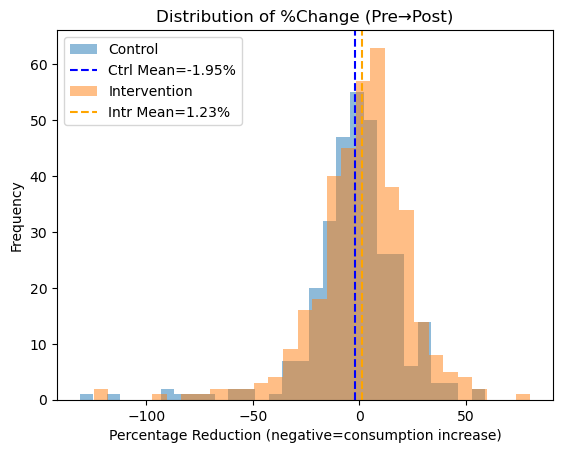


=== Paired T-test (Intervention): H0 => Post=Pre, H1 => Post<Pre ===
Mean diff=Post-Pre => -0.0032, t_stat=-1.2211, two-sided p=0.222828, one-sided p=0.111414
Conclusion (T-test): CANNOT reject H0 => No evidence that Post < Pre.

=== Wilcoxon signed-rank (Intervention): H0 => Post=Pre, H1 => Post<Pre ===
W-stat=29008.0000, two-sided p=0.006194, one-sided p=0.003097
Conclusion (Wilcoxon): REJECT H0 => Intervention's Post usage < Pre usage.


In [4]:
generate_intervention_analysis(
    include_time_of_day_start=16,
    include_time_of_day_end=19,
    exclude_time_of_day_start=None,
    exclude_time_of_day_end=None,
    pre_start=pd.Timestamp("2023-04-01 00:00:00"),
    pre_end=pd.Timestamp("2023-12-20 23:59:59"),
    post_start=pd.Timestamp("2024-04-01 00:00:00"),
    post_end=pd.Timestamp("2024-12-20 23:59:59"),
    lower_end_consumption=0,
    higher_end_consumption=97.5,
    file_path=r"C:\Users\gerva\OneDrive\Documentos\GitHub\ST498_CAPSTONE\FLASH\toShare"
)


[INFO] Processing controlePreConsolide.csv -> Min Time: 2023-02-02 00:00:00, Max Time: 2024-01-31 23:30:00
[INFO] Processing controleConsolide.csv -> Min Time: 2024-04-01 00:00:00, Max Time: 2024-12-31 23:30:00
[INFO] Processing interventionPreConsolide.csv -> Min Time: 2023-02-02 00:00:00, Max Time: 2024-01-31 23:30:00
[INFO] Processing interventionConsolide.csv -> Min Time: 2024-04-01 00:00:00, Max Time: 2024-12-31 23:30:00
[INFO] Full pivot shape => (705, 5)
[INFO] After trimming => 682 rows remain
[INFO] df_control shape=(308, 5), df_intervention shape=(374, 5)


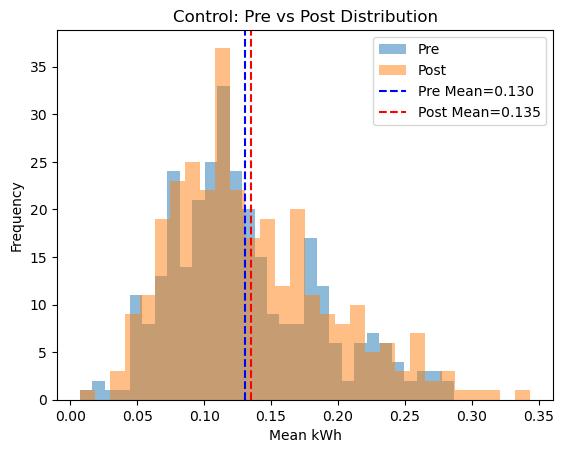

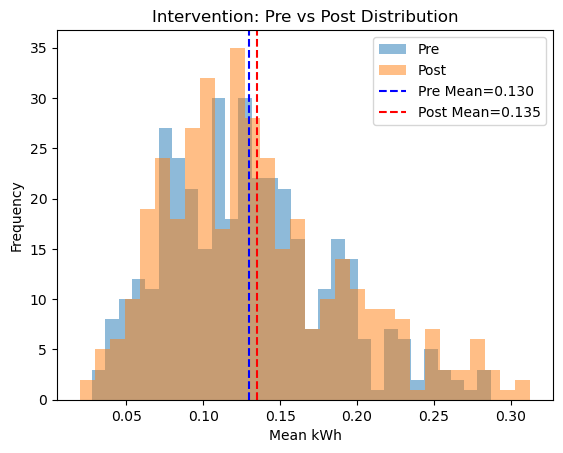

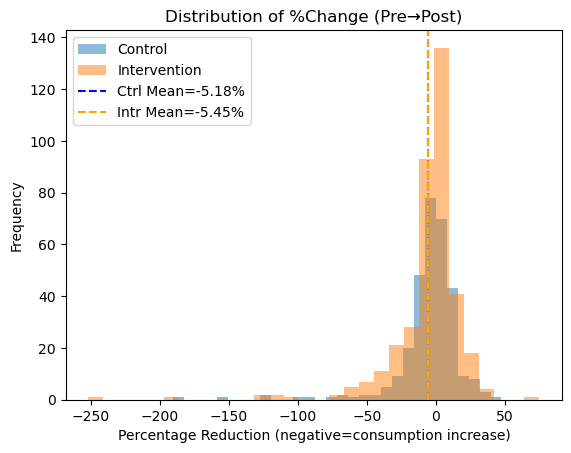


=== Paired T-test for Intervention: H0 => Post=Pre, H1 => Post<Pre ===
Intervention Pre mean=0.130, Post mean=0.135
Mean diff=Post-Pre => 0.0052
T-stat=3.6146, two-sided p=0.000342, one-sided p=0.999829
Conclusion: We CANNOT reject H0. No significant evidence that Intervention's Post usage is lower than Pre at alpha=0.05.


In [100]:
generate_intervention_analysis(
    include_time_of_day_start=0,
    include_time_of_day_end=24,
    exclude_time_of_day_start=16,
    exclude_time_of_day_end=19,
    pre_start=pd.Timestamp("2023-04-01 00:00:00"),
    pre_end=pd.Timestamp("2023-12-20 23:59:59"),
    post_start=pd.Timestamp("2024-04-01 00:00:00"),
    post_end=pd.Timestamp("2024-12-20 23:59:59"),
    lower_end_consumption=0,
    higher_end_consumption=97.5,
    file_path=r"C:\Users\gerva\OneDrive\Documentos\GitHub\ST498_CAPSTONE\FLASH\toShare"
)


In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from scipy.stats import ttest_rel, wilcoxon, norm

def generate_sunday_pre_post_analysis(
        time_of_day_start=0,
        time_of_day_end=24,
        pre_start=pd.Timestamp("2023-02-01 00:00:00"),
        pre_end=pd.Timestamp("2024-01-31 23:59:59"),
        post_start=pd.Timestamp("2024-04-01 00:00:00"),
        post_end=pd.Timestamp("2024-12-31 23:59:59"),
        lower_end_consumption=2.5,
        higher_end_consumption=97.5,
        illustrate_wilcoxon=False,    # <-- NEW: if True, simulate Wilcoxon distribution under H0
        nsim=20000,                  # Monte Carlo replicates for the Wilcoxon distribution
        file_path=r"C:\path\to\your\data"
    ):
    """
    Compare Pre vs. Post specifically on Sundays for both Control & Intervention,
    testing if Post usage is higher than Pre usage (H1: Post>Pre).
    If illustrate_wilcoxon=True, we also simulate the Wilcoxon T+ distribution under H0
    for each group and plot a histogram with the observed T+.

    Files:
      - Control Pre Sunday => "controlePreConsolide.csv" (which includes Mon–Sun, so we filter Sundays)
      - Control Post Sunday => "controleConsolideSunday.csv" (Sunday-only)
      - Intervention Pre Sunday => "interventionPreConsolide.csv" (Mon–Sun, filter Sundays)
      - Intervention Post Sunday => "interventionConsolideSunday.csv" (Sunday-only)

    Steps:
      1) Filter each file to Sunday, date/time range.
      2) Pivot => [Pre, Post] for each ANON_ID. 
      3) Paired T-test + Wilcoxon => H0: Post=Pre, H1: Post>Pre.
      4) If illustrate_wilcoxon=True, simulate T+ distribution under H0 and overlay the actual T+.

    Returns
    -------
    None
    """

    # ---------- Helper Functions ---------------------------------------------
    def read_pre_sunday(file_name, start_date, end_date):
        """Reads a 'Pre' file (which has Mon–Sun), keeps only Sunday & relevant hours."""
        df = pd.read_csv(os.path.join(file_path, file_name))
        df = df.rename(columns={'Unnamed: 0': 'Time'})
        df['Time'] = pd.to_datetime(df['Time'], format="%Y-%m-%d %H:%M:%S")

        print(f"[INFO] Pre Sunday file: {file_name} => min={df['Time'].min()}, max={df['Time'].max()}")

        df = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)]
        df = df[df['Time'].dt.weekday == 6]  # Sunday => weekday==6
        df = df[
            (df['Time'].dt.hour >= time_of_day_start) &
            (df['Time'].dt.hour <  time_of_day_end)
        ]

        df_long = df.melt(id_vars=['Time'], var_name='ANON_ID', value_name='ELEC_KWH')
        df_long.drop_duplicates(subset=['Time','ANON_ID'], inplace=True)
        df_agg = df_long.groupby('ANON_ID', as_index=False)['ELEC_KWH'].mean()
        return df_agg

    def read_post_sunday(file_name, start_date, end_date):
        """Reads a 'Post' Sunday file, which is already Sunday-only data, and filters by date/time-of-day."""
        df = pd.read_csv(os.path.join(file_path, file_name))
        df = df.rename(columns={'Unnamed: 0': 'Time'})
        df['Time'] = pd.to_datetime(df['Time'], format="%Y-%m-%d %H:%M:%S")

        print(f"[INFO] Post Sunday file: {file_name} => min={df['Time'].min()}, max={df['Time'].max()}")

        df = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)]
        df = df[
            (df['Time'].dt.hour >= time_of_day_start) &
            (df['Time'].dt.hour <  time_of_day_end)
        ]

        df_long = df.melt(id_vars=['Time'], var_name='ANON_ID', value_name='ELEC_KWH')
        df_long.drop_duplicates(subset=['Time','ANON_ID'], inplace=True)
        df_agg = df_long.groupby('ANON_ID', as_index=False)['ELEC_KWH'].mean()
        return df_agg

    # ---------- Wilcoxon simulation under H0 (mean diff=0) -------------------
    def simulate_wilcoxon_distribution(n, nsim=20000, seed=42):
        """
        Monte Carlo approach: generate n diffs ~ N(0,1) => compute T+ each time => plot distribution.
        Returns the array of T+ values for optional usage.
        """
        np.random.seed(seed)
        wstats = []
        for _ in range(nsim):
            diffs = np.random.normal(loc=0.0, scale=1.0, size=n)
            if np.allclose(diffs, 0.0):
                continue
            Tplus, _ = wilcoxon(diffs)
            wstats.append(Tplus)
        return np.array(wstats)

    # -------------------------------------------------------------------------
    # 1) Read data for each group (Pre Sunday, Post Sunday)
    # -------------------------------------------------------------------------
    ctrl_pre_sun  = read_pre_sunday("controlePreConsolide.csv", pre_start, pre_end)
    ctrl_pre_sun['Group'] = 'Control';    ctrl_pre_sun['Phase'] = 'Pre'

    ctrl_post_sun = read_post_sunday("controleConsolideSunday.csv", post_start, post_end)
    ctrl_post_sun['Group'] = 'Control';   ctrl_post_sun['Phase'] = 'Post'

    intr_pre_sun  = read_pre_sunday("interventionPreConsolide.csv", pre_start, pre_end)
    intr_pre_sun['Group'] = 'Intervention'; intr_pre_sun['Phase']='Pre'

    intr_post_sun = read_post_sunday("interventionConsolideSunday.csv", post_start, post_end)
    intr_post_sun['Group'] = 'Intervention'; intr_post_sun['Phase']='Post'

    # Combine
    df_combined = pd.concat([
        ctrl_pre_sun, ctrl_post_sun,
        intr_pre_sun, intr_post_sun
    ], ignore_index=True)

    # 2) Pivot => columns [Pre, Post], one row per ANON_ID+Group
    df_mean = df_combined.groupby(['ANON_ID','Group','Phase'], as_index=False)['ELEC_KWH'].mean()
    df_pivot = df_mean.pivot(index=['ANON_ID','Group'], columns='Phase', values='ELEC_KWH').reset_index()
    df_pivot.dropna(subset=['Pre','Post'], inplace=True)

    # 3) Trim outliers
    pre_lower = np.percentile(df_pivot['Pre'],  lower_end_consumption)
    pre_upper = np.percentile(df_pivot['Pre'],  higher_end_consumption)
    post_lower= np.percentile(df_pivot['Post'], lower_end_consumption)
    post_upper= np.percentile(df_pivot['Post'], higher_end_consumption)

    df_trim = df_pivot[
        (df_pivot['Pre']  >= pre_lower) & (df_pivot['Pre']  <= pre_upper) &
        (df_pivot['Post'] >= post_lower)& (df_pivot['Post'] <= post_upper)
    ].copy()

    print(f"[INFO] After trimming => {df_trim.shape[0]} matched rows remain")

    # 4) Separate Control vs. Intervention
    df_control = df_trim[df_trim['Group']=='Control'].copy()
    df_intern  = df_trim[df_trim['Group']=='Intervention'].copy()

    cpre_mean = df_control['Pre'].mean()  if len(df_control)>0 else np.nan
    cpost_mean= df_control['Post'].mean() if len(df_control)>0 else np.nan
    ipre_mean = df_intern['Pre'].mean()   if len(df_intern)>0 else np.nan
    ipost_mean= df_intern['Post'].mean()  if len(df_intern)>0 else np.nan

    # 5) Plot: Control Sunday Pre vs Post
    plt.figure()
    if len(df_control)>0:
        plt.hist(df_control['Pre'], bins=30, alpha=0.5, label='Pre')
        plt.hist(df_control['Post'], bins=30, alpha=0.5, label='Post')
        plt.axvline(cpre_mean,  color='blue', linestyle='--', label=f"Pre Mean={cpre_mean:.3f}")
        plt.axvline(cpost_mean, color='red',  linestyle='--', label=f"Post Mean={cpost_mean:.3f}")
    plt.title("Control Sunday: Pre vs Post")
    plt.xlabel("Mean kWh (Sunday)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # 6) Plot: Intervention Sunday Pre vs Post
    plt.figure()
    if len(df_intern)>0:
        plt.hist(df_intern['Pre'],  bins=30, alpha=0.5, label='Pre')
        plt.hist(df_intern['Post'], bins=30, alpha=0.5, label='Post')
        plt.axvline(ipre_mean,   color='blue',  linestyle='--', label=f"Pre Mean={ipre_mean:.3f}")
        plt.axvline(ipost_mean,  color='red',   linestyle='--', label=f"Post Mean={ipost_mean:.3f}")
    plt.title("Intervention Sunday: Pre vs Post")
    plt.xlabel("Mean kWh (Sunday)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # 7) Tests: Paired T-test + Wilcoxon => H1 => Post>Pre
    alpha=0.05

    for group_name, df_grp in [('Control', df_control), ('Intervention', df_intern)]:
        print(f"\n=== {group_name} Sunday: Paired T-test & Wilcoxon => H1 => Post>Pre ===")
        n = len(df_grp)
        if n<2:
            print("[WARN] Not enough matched pairs for a paired test.")
            continue

        df_grp['diff'] = df_grp['Post'] - df_grp['Pre']
        mean_diff = df_grp['diff'].mean()

        # (A) Paired T-test
        t_stat, p_twoside_t = ttest_rel(df_grp['Post'], df_grp['Pre'])
        if mean_diff>0:
            p_oneside_t = p_twoside_t/2
        else:
            p_oneside_t = 1 - (p_twoside_t/2)

        print(f"[T-test] mean_diff=Post-Pre => {mean_diff:.4f}, t_stat={t_stat:.4f}, two-sided p={p_twoside_t:.6f}, one-sided p={p_oneside_t:.6f}")
        if p_oneside_t<alpha and mean_diff>0:
            print("Conclusion (T-test): REJECT H0 => Post>Pre.")
        else:
            print("Conclusion (T-test): No evidence Post>Pre.")

        # (B) Wilcoxon
        # By default, 'wilcoxon(x, y=None)' => T+ for x
        Tplus, p_twoside_w = wilcoxon(df_grp['Post'], df_grp['Pre'])
        if mean_diff>0:
            p_oneside_w = p_twoside_w/2
        else:
            p_oneside_w = 1 - (p_twoside_w/2)

        print(f"[Wilcoxon] T+={Tplus:.4f}, two-sided p={p_twoside_w:.6f}, one-sided p={p_oneside_w:.6f}")
        if p_oneside_w<alpha and mean_diff>0:
            print("Conclusion (Wilcoxon): REJECT H0 => Post>Pre.")
        else:
            print("Conclusion (Wilcoxon): No evidence Post>Pre.")

        # --- If user requested illustration of Wilcoxon distribution under H0
        if illustrate_wilcoxon and n>=2:
            simulate_and_plot_wilcoxon(df_grp, Tplus, n, nsim)


def simulate_and_plot_wilcoxon(df_grp, observed_Tplus, n, nsim=20000):
    """
    Called inside generate_sunday_pre_post_analysis if illustrate_wilcoxon=True.
    We'll simulate T+ under H0 =>  diffs ~ N(0,1). Then plot distribution
    with a vertical line for the observed T+ in 'observed_Tplus'.
    """
    # 1) Simulate T+ for n diffs under H0
    wstats = []
    np.random.seed(42)
    for _ in range(nsim):
        diffs = np.random.normal(0.0, 1.0, n)
        # skip if all zero
        if np.allclose(diffs, 0):
            continue
        Tplus_sim, _ = wilcoxon(diffs)
        wstats.append(Tplus_sim)
    wstats = np.array(wstats)

    # 2) Plot histogram
    plt.figure(figsize=(8,5))
    plt.hist(wstats, bins=30, alpha=0.5, density=True, label='Simulated T+ (H0)')

    # 3) Normal approximation overlay
    # Under H0 for Wilcoxon signed-rank, T+ ~ mean=n(n+1)/4, var=n(n+1)(2n+1)/24
    mean_approx = n*(n+1)/4.0
    var_approx  = n*(n+1)*(2*n+1)/24.0
    std_approx  = np.sqrt(var_approx)
    x = np.linspace(0, n*(n+1)/2, 400)
    pdf_approx  = norm.pdf(x, loc=mean_approx, scale=std_approx)
    plt.plot(x, pdf_approx, 'r-', alpha=0.6, label='Normal approx')

    # 4) Vertical line for observed T+
    plt.axvline(observed_Tplus, color='orange', linestyle='--', label=f"Observed T+={observed_Tplus:.1f}")

    plt.title(f"Wilcoxon T+ Distribution under H0 (n={n})\nObserved T+={observed_Tplus:.1f}")
    plt.xlabel("T+")
    plt.ylabel("Density")
    plt.legend()
    plt.show()


[INFO] Pre Sunday file: controlePreConsolide.csv => min=2023-02-02 00:00:00, max=2024-01-31 23:30:00
[INFO] Post Sunday file: controleConsolideSunday.csv => min=2024-04-07 00:00:00, max=2024-12-29 23:30:00
[INFO] Pre Sunday file: interventionPreConsolide.csv => min=2023-02-02 00:00:00, max=2024-01-31 23:30:00
[INFO] Post Sunday file: interventionConsolideSunday.csv => min=2024-04-07 00:00:00, max=2024-12-29 23:30:00
[INFO] After trimming => 648 matched rows remain


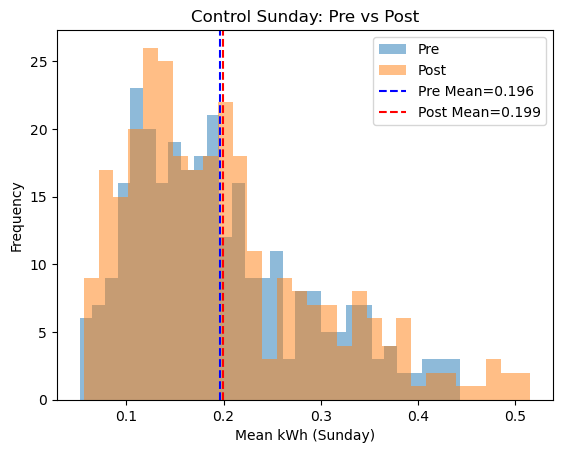

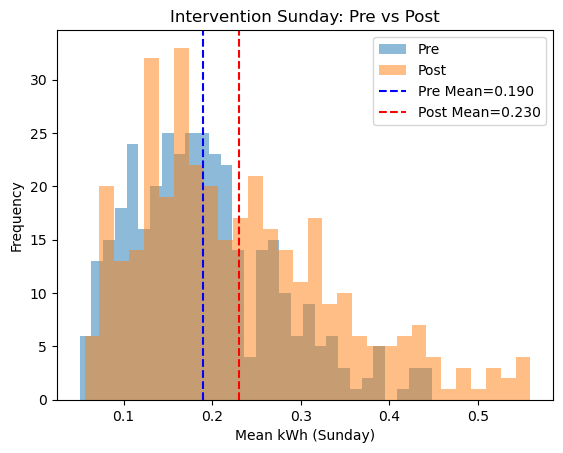


=== Control Sunday: Paired T-test & Wilcoxon => H1 => Post>Pre ===
[T-test] mean_diff=Post-Pre => 0.0030, t_stat=1.0779, two-sided p=0.281975, one-sided p=0.140987
Conclusion (T-test): No evidence Post>Pre.
[Wilcoxon] T+=20606.0000, two-sided p=0.587677, one-sided p=0.293838
Conclusion (Wilcoxon): No evidence Post>Pre.


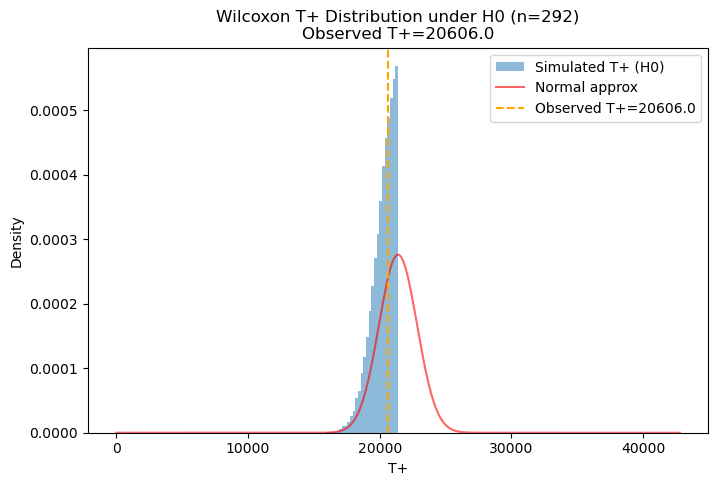


=== Intervention Sunday: Paired T-test & Wilcoxon => H1 => Post>Pre ===
[T-test] mean_diff=Post-Pre => 0.0398, t_stat=9.6028, two-sided p=0.000000, one-sided p=0.000000
Conclusion (T-test): REJECT H0 => Post>Pre.
[Wilcoxon] T+=13593.0000, two-sided p=0.000000, one-sided p=0.000000
Conclusion (Wilcoxon): REJECT H0 => Post>Pre.


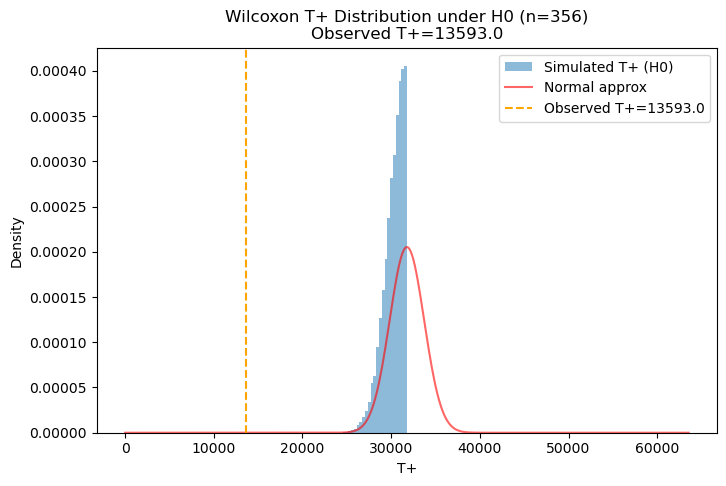

In [16]:

generate_sunday_pre_post_analysis(
    time_of_day_start=8,
    time_of_day_end=12,
    pre_start=pd.Timestamp("2023-02-01 00:00:00"),
    pre_end=pd.Timestamp("2024-01-31 23:59:59"),
    post_start=pd.Timestamp("2024-04-01 00:00:00"),
    post_end=pd.Timestamp("2024-12-31 23:59:59"),
    lower_end_consumption=2.5,
    higher_end_consumption=97.5,
    illustrate_wilcoxon=True,    # if True, simulate Wilcoxon distribution under H0
    nsim=20000,    
    file_path=r"C:\Users\gerva\OneDrive\Documentos\GitHub\ST498_CAPSTONE\FLASH\toShare"
)


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, norm

def illustrate_wilcoxon_distribution(n=15, nsim=20000, mu_diff=0.0, seed=42):
    """
    Simulate data under H0 (mu_diff=0) for a paired scenario.
    For each simulated dataset, compute the Wilcoxon signed-rank statistic.
    Then plot the distribution of that statistic.
    
    Parameters
    ----------
    n : int
        Sample size (number of pairs).
    nsim : int
        Number of Monte Carlo replicates.
    mu_diff : float
        Mean difference under the alternative. Set to 0 for H0.
    seed : int
        Random seed for reproducibility.
    """
    np.random.seed(seed)
    
    # We'll store the Wilcoxon statistic (T+ or T-).
    # By default, scipy.stats.wilcoxon returns the sum of ranks of positive differences (T+).
    # We collect those and see how they vary under H0 or mu_diff != 0.
    wstats = []
    
    for _ in range(nsim):
        # Generate n differences from a normal with mean=mu_diff (0 => H0)
        # There's no essential restriction that it be normal, but let's do so for demonstration
        diffs = np.random.normal(loc=mu_diff, scale=1.0, size=n)

        # If all diffs are 0, Wilcoxon returns a degenerate result
        # We'll skip that replicate
        if np.allclose(diffs, 0.0):
            continue

        # Compute the Wilcoxon signed-rank test statistic
        # By default, wilcoxon(x,y=None) => a one-sample signed-rank test
        # returning (T+, pvalue).
        Tplus, _ = wilcoxon(diffs)
        wstats.append(Tplus)
    
    wstats = np.array(wstats)
    
    # 1) Plot the histogram of T+ values
    plt.figure(figsize=(8,5))
    plt.hist(wstats, bins=30, alpha=0.5, density=True, label='Simulated T+')
    
    # 2) For large n, T+ ~ normal with mean = n(n+1)/4, var = n(n+1)(2n+1)/24
    # Let's overlay that normal approximation if n is large enough
    mean_approx = n*(n+1)/4.0
    var_approx  = n*(n+1)*(2*n+1)/24.0
    std_approx  = np.sqrt(var_approx)

    # x-range for the normal approximation
    x = np.linspace(0, n*(n+1)/2.0, 500)
    y = norm.pdf(x, loc=mean_approx, scale=std_approx)
    plt.plot(x, y, 'r-', label='Normal approx', alpha=0.7)
    
    plt.title(f"Wilcoxon Signed-Rank Distribution (n={n}, mu_diff={mu_diff}, nsim={nsim})")
    plt.xlabel("T+ (sum of positive ranks)")
    plt.ylabel("Density")
    plt.legend()
    plt.show()


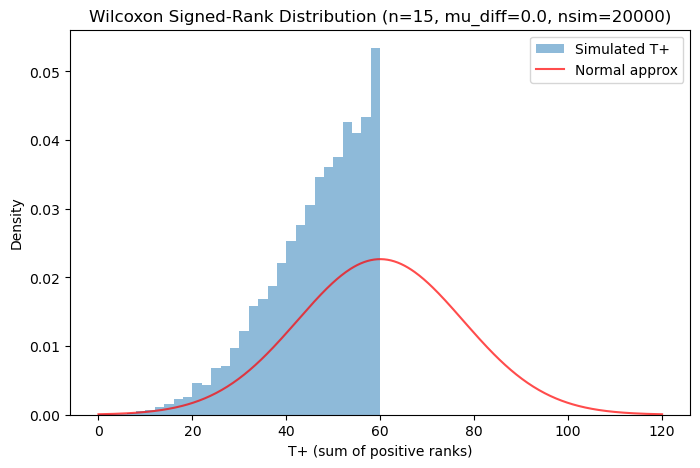

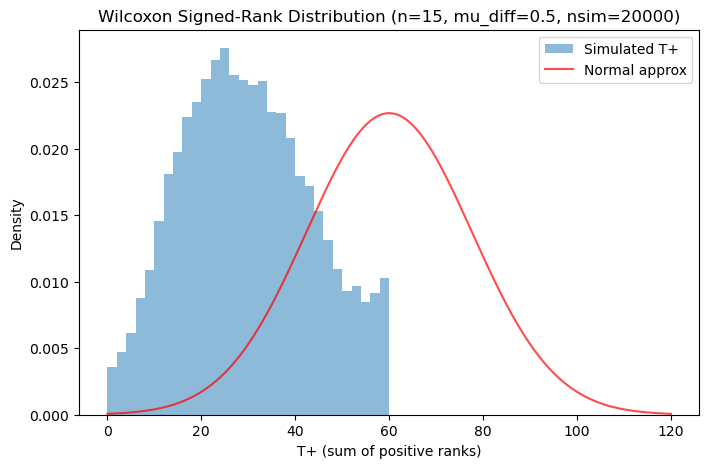

In [14]:
# Example: Under the null hypothesis => mu_diff=0
illustrate_wilcoxon_distribution(n=15, nsim=20000, mu_diff=0.0)

# Or to see how it shifts if there's a positive difference
illustrate_wilcoxon_distribution(n=15, nsim=20000, mu_diff=0.5)


[INFO] Pre Sunday file: controlePreConsolide.csv => min=2023-02-02 00:00:00, max=2024-01-31 23:30:00
[INFO] Post Sunday file: controleConsolideSunday.csv => min=2024-04-07 00:00:00, max=2024-12-29 23:30:00
[INFO] Pre Sunday file: interventionPreConsolide.csv => min=2023-02-02 00:00:00, max=2024-01-31 23:30:00
[INFO] Post Sunday file: interventionConsolideSunday.csv => min=2024-04-07 00:00:00, max=2024-12-29 23:30:00
[INFO] After trimming => 649 matched rows remain


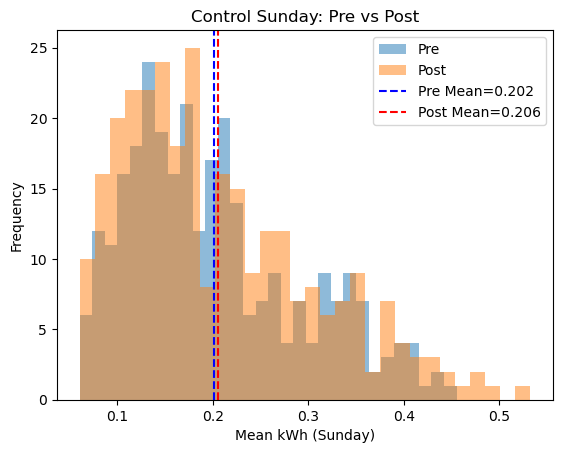

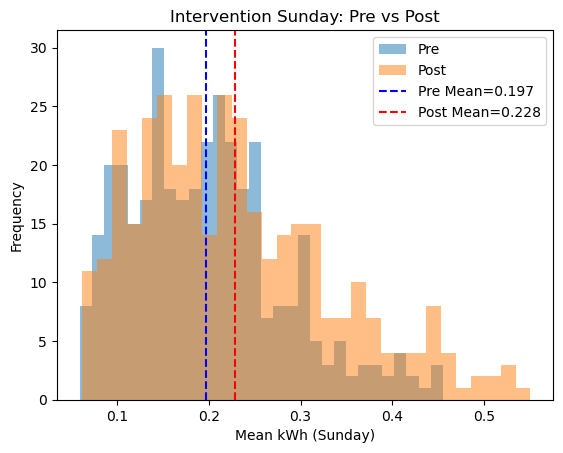


=== Control Sunday: Paired T-test & Wilcoxon => H1 => Post>Pre ===
[T-test] mean_diff=Post-Pre => 0.0039, t_stat=1.4929, two-sided p=0.136539, one-sided p=0.068270
Conclusion (T-test): No evidence Post>Pre.
[Wilcoxon] T+=20646.0000, two-sided p=0.606898, one-sided p=0.303449
Conclusion (Wilcoxon): No evidence Post>Pre.


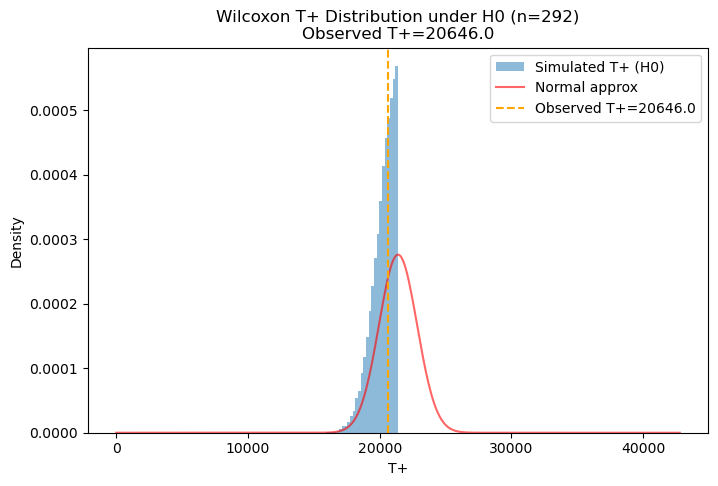


=== Intervention Sunday: Paired T-test & Wilcoxon => H1 => Post>Pre ===
[T-test] mean_diff=Post-Pre => 0.0311, t_stat=8.8730, two-sided p=0.000000, one-sided p=0.000000
Conclusion (T-test): REJECT H0 => Post>Pre.
[Wilcoxon] T+=16065.0000, two-sided p=0.000000, one-sided p=0.000000
Conclusion (Wilcoxon): REJECT H0 => Post>Pre.


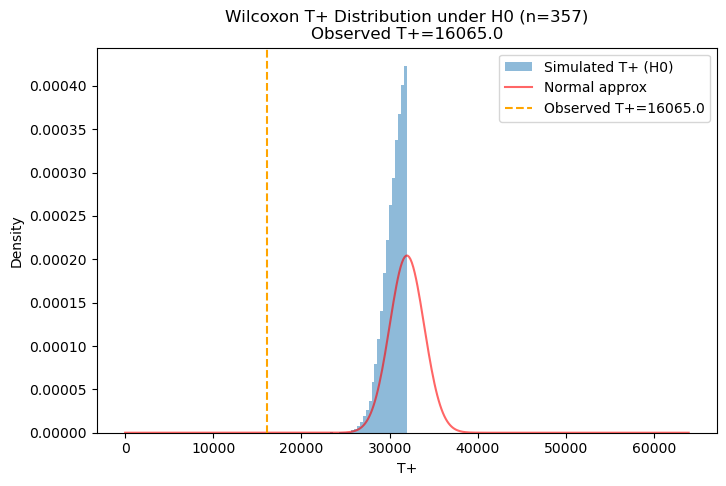

In [108]:

generate_sunday_pre_post_analysis(
    time_of_day_start=8,
    time_of_day_end=16,
    pre_start=pd.Timestamp("2023-02-01 00:00:00"),
    pre_end=pd.Timestamp("2024-01-31 23:59:59"),
    post_start=pd.Timestamp("2024-04-01 00:00:00"),
    post_end=pd.Timestamp("2024-12-31 23:59:59"),
    lower_end_consumption=2.5,
    higher_end_consumption=97.5,
    illustrate_wilcoxon=True,    # if True, simulate Wilcoxon distribution under H0
    nsim=20000,    
    file_path=r"C:\Users\gerva\OneDrive\Documentos\GitHub\ST498_CAPSTONE\FLASH\toShare"
)


# SPECTRAL CLUSTERING

In [40]:
pre_start = pd.Timestamp("2023-02-01 00:00:00")
pre_end   = pd.Timestamp("2024-01-31 23:59:59")

post_start = pd.Timestamp("2024-04-01 00:00:00")
post_end   = pd.Timestamp("2024-12-31 23:59:59")

def preprocess(file_name, start_date, end_date):
    df = pd.read_csv(os.path.join(file_path, file_name))
    df = df.rename(columns={'Unnamed: 0': 'Time'})
    
    # Convert Time column to datetime
    df['Time'] = pd.to_datetime(df['Time'], format="%Y-%m-%d %H:%M:%S")
    print(f"Processing {file_name} -> Min Time: {df['Time'].min()}, Max Time: {df['Time'].max()}")
    df = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)] # Filter by time range (pre or post)
  
    df_long = df.melt(id_vars=['Time'], var_name='ANON_ID', value_name='ELEC_KWH') # Convert from wide to long format
    df_long.drop_duplicates(subset=['Time', 'ANON_ID'], inplace=True) # Remove duplicates after melting

    return df_long



In [100]:
df_controlpre        = preprocess("controlePreConsolide.csv", pre_start, pre_end)
df_interventionpre   = preprocess("interventionPreConsolide.csv", pre_start, pre_end)
print(df_controlpre.shape)
print(df_interventionpre.shape)
df_pre = pd.concat([df_controlpre,df_interventionpre],ignore_index=True)
df_pre

Processing controlePreConsolide.csv -> Min Time: 2023-02-02 00:00:00, Max Time: 2024-01-31 23:30:00
Processing interventionPreConsolide.csv -> Min Time: 2023-02-02 00:00:00, Max Time: 2024-01-31 23:30:00
(5540480, 3)
(6722577, 3)


,Time,ANON_ID,ELEC_KWH
0,2023-02-02 00:00:00,4dd3317694364b953434dc42eff7f9950095c4ab537c3b...,0.140
1,2023-02-02 00:30:00,4dd3317694364b953434dc42eff7f9950095c4ab537c3b...,0.138
2,2023-02-02 01:00:00,4dd3317694364b953434dc42eff7f9950095c4ab537c3b...,0.128
3,2023-02-02 01:30:00,4dd3317694364b953434dc42eff7f9950095c4ab537c3b...,0.149
4,2023-02-02 02:00:00,4dd3317694364b953434dc42eff7f9950095c4ab537c3b...,0.137
...,...,...,...
12263052,2024-01-31 21:30:00,0ac6b700dd2b349baeca58a73029d17346d6d2396c9d77...,0.182
12263053,2024-01-31 22:00:00,0ac6b700dd2b349baeca58a73029d17346d6d2396c9d77...,0.113
12263054,2024-01-31 22:30:00,0ac6b700dd2b349baeca58a73029d17346d6d2396c9d77...,0.084
12263055,2024-01-31 23:00:00,0ac6b700dd2b349baeca58a73029d17346d6d2396c9d77...,0.027


In [73]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.sparse.linalg import eigsh

def spectral_clustering_analysis(
    dataframe = df_pre,
    pre_start=pd.Timestamp("2023-02-01 00:00:00"),
    pre_end=pd.Timestamp("2024-01-31 23:59:59"),
    k_knn=5,
    k_clusters=10,
    file_path=r"C:\path\to\your\data",
    plot_eigenvalues=True,
    plot_eigvec_scatter=True,
    plot_cluster_profiles=True
):
    """
    1) Reads a 'long' CSV with columns like [Time, ANON_ID, ELEC_KWH].
    2) Filters by [pre_start, pre_end].
    3) Aggregates + pivots to create 48 half-hour columns per ANON_ID
       (one row per ANON_ID with shape (n, 49) => [ANON_ID, 48 half-hour cols]).
    4) Performs spectral clustering with a k-NN adjacency + normalized Laplacian.
    5) Returns a DataFrame with columns: [ANON_ID, <48 half-hour columns>, 'Cluster'].

    Parameters
    ----------
    file_name : str
        Name of the CSV containing the time-series data: [Time, ANON_ID, ELEC_KWH].
    pre_start, pre_end : pd.Timestamp
        Date range filter. Keep rows where Time is in [pre_start, pre_end].
    k_knn : int
        #neighbors in the k-NN graph.
    k_clusters : int
        #clusters to use in KMeans on the spectral embedding.
    file_path : str
        Directory path to read the CSV.
    plot_eigenvalues, plot_eigvec_scatter, plot_cluster_profiles : bool
        Whether to produce the corresponding plots.

    Returns
    -------
    df_out : pd.DataFrame
        Has columns: [ANON_ID, half-hour1, half-hour2, ..., half-hour48, 'Cluster'].
    """

    # -------------------------------------------------------------------------
    # (A) READ + AGGREGATE TO 48 HALF-HOUR COLUMNS
    # -------------------------------------------------------------------------
    df = dataframe
    # Convert Time column to datetime if not already
    df['Time'] = pd.to_datetime(df['Time'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

    # Filter date range
    df = df[(df['Time'] >= pre_start) & (df['Time'] <= pre_end)].copy()

    # For half-hour detection, we assume each row is exactly one half-hour reading
    # in the time series. If not, adapt logic. We'll group by [ANON_ID, day-of-year, half-hour index].
    # Alternatively, you might do something more direct. Example approach:

    # Let's create an integer 'day_index' = date part of Time,
    # and 'hh_index' = which half-hour of the day (0 to 47).
    df['date'] = df['Time'].dt.floor('D')  # or dt.date
    # half-hour index: e.g. hour*2 + (minute//30)
    df['hh_index'] = df['Time'].dt.hour * 2 + (df['Time'].dt.minute // 30)

    # We want an average daily consumption across all dates, or do we want just the grand average?
    # The question is how you want to handle multiple days per ANON_ID. 
    # Possibly you want the average across all days for that half-hour?
    # We'll do: group by [ANON_ID, hh_index] => average ELEC_KWH across all days in the range.
    # That yields a single row per (ANON_ID, hh_index).

    agg = (df.groupby(['ANON_ID', 'hh_index'], as_index=False)
             .agg({'ELEC_KWH':'mean'}))

    # Now pivot => columns=hh_index from 0..47, row=ANON_ID
    df_wide = agg.pivot(index='ANON_ID', columns='hh_index', values='ELEC_KWH').reset_index()

    # Possibly rename columns to something like HalfHour_0..HalfHour_47
    halfhour_cols = [f"HH_{c:02d}" for c in range(48)]
    # In case some columns are missing if not all half-hours appear, reindex
    # We'll do .reindex to ensure we have all 48 columns in order 0..47.
    df_wide = df_wide.reindex(columns=[ 'ANON_ID' ] + list(range(48)), fill_value=0)
    col_map = {i: halfhour_cols[i] for i in range(48)}
    df_wide.rename(columns=col_map, inplace=True)

    print(f"[INFO] Aggregated shape => {df_wide.shape} (ANON_ID + 48 half-hour columns)")

    # -------------------------------------------------------------------------
    # (B) SPECTRAL CLUSTERING
    # -------------------------------------------------------------------------
    # Extract consumption array shape(n,48)
    household_ids = df_wide['ANON_ID'].values
    consumption_raw = df_wide.drop(columns=['ANON_ID']).values
    n = consumption_raw.shape[0]

    # Standardize
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    consumption = scaler.fit_transform(consumption_raw)

    # Distances
    from sklearn.metrics.pairwise import euclidean_distances
    dist = euclidean_distances(consumption, consumption)
    sigma = np.median(dist)
    W = np.exp(-dist**2 / (2*sigma**2))

    # k-NN
    for i in range(n):
        idx_sorted = np.argsort(dist[i,:])
        keep_idx = idx_sorted[:k_knn+1]
        mask = np.ones(n, dtype=bool)
        mask[keep_idx] = False
        W[i, mask] = 0.

    # Symmetrize
    W = 0.5*(W + W.T)

    # Normalized Laplacian
    d = np.sum(W, axis=1)
    D = np.diag(d)
    D_inv = np.linalg.inv(D)
    Lrw = np.eye(n) - D_inv.dot(W)

    # Eigenvectors
    from scipy.sparse.linalg import eigsh
    evals, evecs = eigsh(Lrw, k=k_clusters, which='SM')

    # K-means in embedding
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k_clusters, random_state=42)
    labels = kmeans.fit_predict(evecs)

    # Evaluate silhouette
    from sklearn.metrics import silhouette_score
    sil_score = silhouette_score(evecs, labels)
    print(f"Spectral Clustering => k_knn={k_knn}, k_clusters={k_clusters}")
    print(f"Silhouette Score: {sil_score:.4f}")

    # Print cluster sizes
    unique_clusters, counts = np.unique(labels, return_counts=True)
    for c, cnt in zip(unique_clusters, counts):
        print(f"Cluster {c}: {cnt} ANON_IDs")

    # --- Optional Plots ---
    if plot_eigenvalues:
        thresh = 0.05*np.max(evals)
        plt.figure()
        plt.plot(range(1, k_clusters+1), evals, marker='o', label="Eigenvalues")
        plt.axhline(y=thresh, color='red', linestyle='--', label=f"5% of max eval={thresh:.4f}")
        plt.xlabel("Eigenvalue Index")
        plt.ylabel("Eigenvalue")
        plt.title("Eigenvalues of Lrw")
        plt.legend()
        plt.grid(True)
        plt.show()

    if plot_eigvec_scatter and k_clusters>=2:
        plt.figure()
        plt.scatter(evecs[:,0], evecs[:,1], c=labels, cmap='viridis', alpha=0.7)
        plt.xlabel("Eigenvector 1")
        plt.ylabel("Eigenvector 2")
        plt.title("Spectral Embedding (first two eigvecs)")
        plt.colorbar(label="Cluster")
        plt.grid(True)
        plt.show()

    if plot_cluster_profiles:
        plt.figure()
        for c in unique_clusters:
            c_idx = np.where(labels==c)[0]
            mean_profile = np.mean(consumption_raw[c_idx,:], axis=0)
            plt.plot(range(1,49), mean_profile, label=f'Cluster {c}')
        plt.xlabel("Half-hour Interval")
        plt.ylabel("Mean Consumption (kWh)")
        plt.title("Average Daily Consumption Profile per Cluster")
        plt.legend()
        plt.grid(True)
        plt.show()

    # Attach 'Cluster' to df_wide
    df_wide['Cluster'] = labels
    # Return the final df
    return df_wide


[INFO] Aggregated shape => (707, 49) (ANON_ID + 48 half-hour columns)


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Spectral Clustering => k_knn=10, k_clusters=10
Silhouette Score: 0.3793
Cluster 0: 47 ANON_IDs
Cluster 1: 89 ANON_IDs
Cluster 2: 134 ANON_IDs
Cluster 3: 48 ANON_IDs
Cluster 4: 104 ANON_IDs
Cluster 5: 2 ANON_IDs
Cluster 6: 83 ANON_IDs
Cluster 7: 1 ANON_IDs
Cluster 8: 97 ANON_IDs
Cluster 9: 102 ANON_IDs


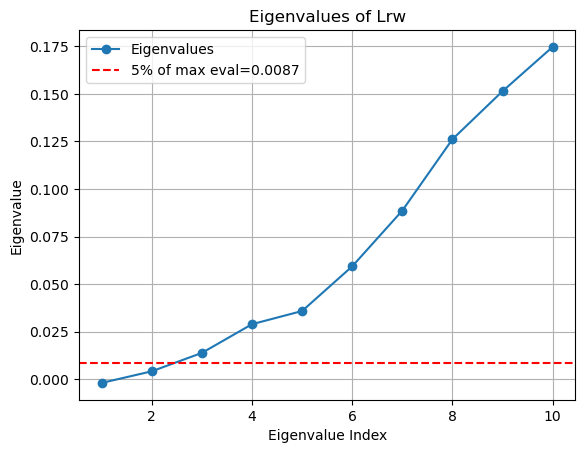

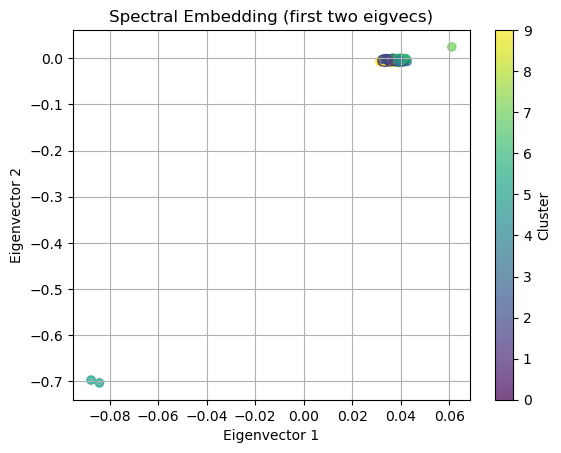

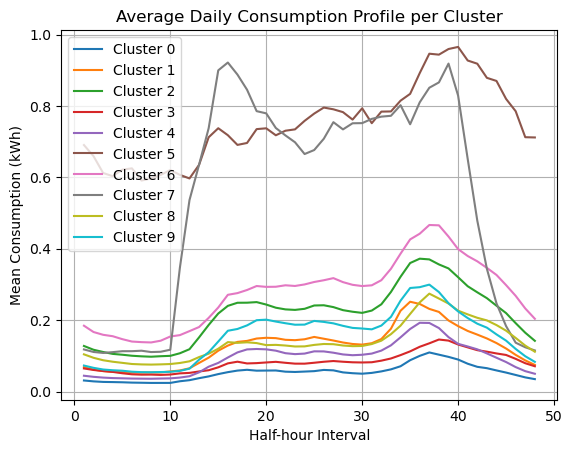

(707, 50)


hh_index,ANON_ID,HH_00,HH_01,HH_02,HH_03,HH_04,HH_05,HH_06,HH_07,HH_08,...,HH_39,HH_40,HH_41,HH_42,HH_43,HH_44,HH_45,HH_46,HH_47,Cluster
0,0045034694b28ba56978092fc4dd601c58774fd74c30b7...,0.025564,0.026037,0.025704,0.025201,0.025163,0.024977,0.024946,0.025241,0.024361,...,0.148172,0.131266,0.112900,0.096321,0.076868,0.058923,0.041977,0.029768,0.026837,4
1,012165987fecd15e61c9a0904c3de15ff6890d4ad579bd...,0.062183,0.057707,0.053922,0.053479,0.052778,0.052161,0.052247,0.052856,0.055931,...,0.253447,0.246710,0.238167,0.209869,0.189731,0.145097,0.103717,0.076208,0.062811,9
2,018e0c5cf686da1b7ac2d170d54aba9263fdc420b65ff5...,0.112667,0.111127,0.104393,0.107134,0.106189,0.105325,0.104628,0.105167,0.106089,...,0.255702,0.233022,0.228544,0.205836,0.185258,0.169903,0.157008,0.137017,0.122431,2
3,01b422497e7deb1a7c0ad65e11faabdd20dc9da6a4e520...,0.073317,0.057309,0.054132,0.053986,0.052888,0.054308,0.053493,0.052860,0.052487,...,0.176563,0.183543,0.211230,0.173664,0.169277,0.162420,0.149378,0.126039,0.098353,9
4,01c05e36af0caaf19d6c35e0340d015ab07e742aa14fda...,0.136017,0.133567,0.117236,0.072056,0.053737,0.043958,0.047116,0.040006,0.038338,...,0.299277,0.178230,0.166548,0.159147,0.188255,0.167424,0.192161,0.165050,0.125931,8


In [74]:

df_clusters_01 = spectral_clustering_analysis(
    dataframe = df_pre,
    pre_start=pd.Timestamp("2023-02-01 00:00:00"),
    pre_end=pd.Timestamp("2024-01-31 23:59:59"),
    k_knn=10,
    k_clusters=10,
    file_path=r"C:\Users\gerva\OneDrive\Documentos\GitHub\ST498_CAPSTONE\FLASH\toShare",
    plot_eigenvalues=True,
    plot_eigvec_scatter=True,
    plot_cluster_profiles=True
)


print(df_clusters_01.shape)
df_clusters_01.head()


### Plot ELEC_KWH vs HH

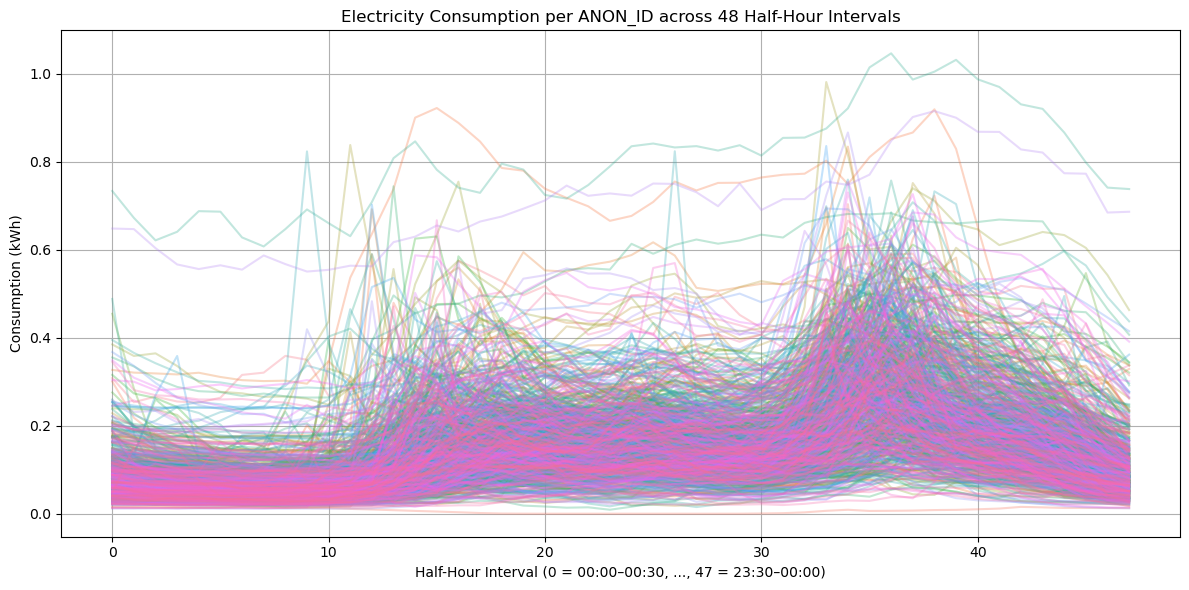

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df_clusters_spec = df_clusters_01
# If specific cluster is wanted, uncomment:
'''
cluster = 9
df_clusters_spec = df_clusters[df_clusters['Cluster']==cluster]
'''
# Melt the dataframe to long format
df_melted = df_clusters_spec.melt(
    id_vars='ANON_ID',
    value_vars=[f'HH_{i:02d}' for i in range(48)],
    var_name='HalfHour',
    value_name='Consumption_kWh'
)

# Convert 'HH_00' → 0, ..., 'HH_47' → 47 (int)
df_melted['HalfHour'] = df_melted['HalfHour'].str.extract(r'(\d+)').astype(int)

# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_melted,
    x='HalfHour',
    y='Consumption_kWh',
    hue='ANON_ID',
    legend=False,
    alpha=0.3
)

plt.title("Electricity Consumption per ANON_ID across 48 Half-Hour Intervals")
plt.xlabel("Half-Hour Interval (0 = 00:00–00:30, ..., 47 = 23:30–00:00)")
plt.ylabel("Consumption (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()

Drop certain clusters from a dataframe

In [51]:
def remove_clusters(df_with_clusters, clusters_to_drop):
    """
    Given a DataFrame that has a 'Cluster' column, drop all rows
    whose 'Cluster' is in the list clusters_to_drop.

    Returns a copy of the filtered DataFrame.
    """
    mask = df_with_clusters['Cluster'].isin(clusters_to_drop)
    return df_with_clusters[~mask].copy()


In [ ]:
Silhouette Score: 0.4292
Cluster 0: 47 ANON_IDs
Cluster 1: 107 ANON_IDs
Cluster 2: 76 ANON_IDs
Cluster 3: 140 ANON_IDs
Cluster 4: 153 ANON_IDs
Cluster 5: 2 ANON_IDs
Cluster 6: 1 ANON_IDs
Cluster 7: 11 ANON_IDs
Cluster 8: 123 ANON_IDs
Cluster 9: 47 ANON_IDs

[INFO] Aggregated shape => (704, 49) (ANON_ID + 48 half-hour columns)


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Spectral Clustering => k_knn=10, k_clusters=10
Silhouette Score: 0.3755
Cluster 0: 48 ANON_IDs
Cluster 1: 124 ANON_IDs
Cluster 2: 11 ANON_IDs
Cluster 3: 96 ANON_IDs
Cluster 4: 63 ANON_IDs
Cluster 5: 81 ANON_IDs
Cluster 6: 44 ANON_IDs
Cluster 7: 73 ANON_IDs
Cluster 8: 73 ANON_IDs
Cluster 9: 91 ANON_IDs


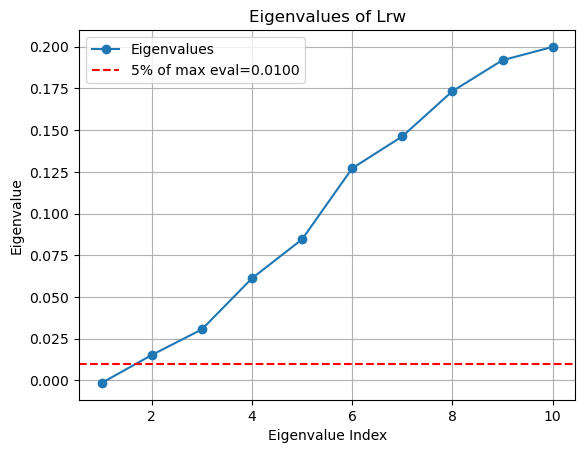

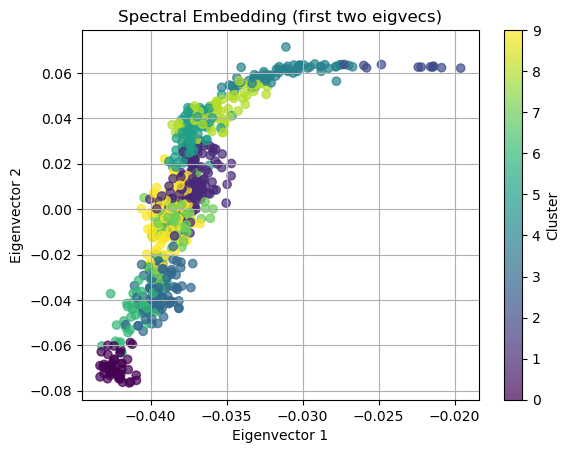

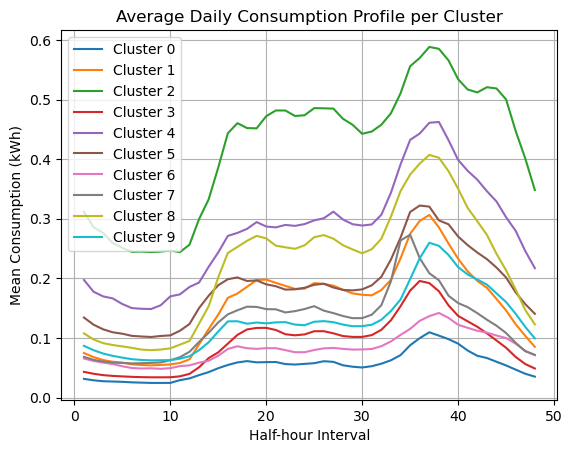

(704, 50)


hh_index,ANON_ID,HH_00,HH_01,HH_02,HH_03,HH_04,HH_05,HH_06,HH_07,HH_08,...,HH_39,HH_40,HH_41,HH_42,HH_43,HH_44,HH_45,HH_46,HH_47,Cluster
0,0045034694b28ba56978092fc4dd601c58774fd74c30b7...,0.025564,0.026037,0.025704,0.025201,0.025163,0.024977,0.024946,0.025241,0.024361,...,0.148172,0.131266,0.112900,0.096321,0.076868,0.058923,0.041977,0.029768,0.026837,3
1,012165987fecd15e61c9a0904c3de15ff6890d4ad579bd...,0.062183,0.057707,0.053922,0.053479,0.052778,0.052161,0.052247,0.052856,0.055931,...,0.253447,0.246710,0.238167,0.209869,0.189731,0.145097,0.103717,0.076208,0.062811,1
2,018e0c5cf686da1b7ac2d170d54aba9263fdc420b65ff5...,0.112667,0.111127,0.104393,0.107134,0.106189,0.105325,0.104628,0.105167,0.106089,...,0.255702,0.233022,0.228544,0.205836,0.185258,0.169903,0.157008,0.137017,0.122431,8
3,01b422497e7deb1a7c0ad65e11faabdd20dc9da6a4e520...,0.073317,0.057309,0.054132,0.053986,0.052888,0.054308,0.053493,0.052860,0.052487,...,0.176563,0.183543,0.211230,0.173664,0.169277,0.162420,0.149378,0.126039,0.098353,1
4,01c05e36af0caaf19d6c35e0340d015ab07e742aa14fda...,0.136017,0.133567,0.117236,0.072056,0.053737,0.043958,0.047116,0.040006,0.038338,...,0.299277,0.178230,0.166548,0.159147,0.188255,0.167424,0.192161,0.165050,0.125931,9


In [77]:
# Ensure only ANON_ID and Clusters are in the df_clusters_01 to avoid unwanted columns
df_pre_02 = df_pre.merge(
    df_clusters_01[['ANON_ID', 'Cluster']],
    on='ANON_ID',
    how='left'  # Use 'left' to preserve all rows in df_pre
)
df_pre_02 = remove_clusters(df_pre_02,[5,7])
df_pre_02 = df_pre_02.drop(columns=["Cluster"]) 
df_clusters_02 = spectral_clustering_analysis(
    dataframe = df_pre_02,
    pre_start=pd.Timestamp("2023-02-01 00:00:00"),
    pre_end=pd.Timestamp("2024-01-31 23:59:59"),
    k_knn=10,
    k_clusters=10,
    file_path=r"C:\Users\gerva\OneDrive\Documentos\GitHub\ST498_CAPSTONE\FLASH\toShare",
    plot_eigenvalues=True,
    plot_eigvec_scatter=True,
    plot_cluster_profiles=True
)


print(df_clusters_02.shape)
df_clusters_02.head()


In [78]:
df_clusters_02 = df_clusters_02.drop(columns=["Cluster"]) 
df_clusters_02

hh_index,ANON_ID,HH_00,HH_01,HH_02,HH_03,HH_04,HH_05,HH_06,HH_07,HH_08,...,HH_38,HH_39,HH_40,HH_41,HH_42,HH_43,HH_44,HH_45,HH_46,HH_47
0,0045034694b28ba56978092fc4dd601c58774fd74c30b7...,0.025564,0.026037,0.025704,0.025201,0.025163,0.024977,0.024946,0.025241,0.024361,...,0.153347,0.148172,0.131266,0.112900,0.096321,0.076868,0.058923,0.041977,0.029768,0.026837
1,012165987fecd15e61c9a0904c3de15ff6890d4ad579bd...,0.062183,0.057707,0.053922,0.053479,0.052778,0.052161,0.052247,0.052856,0.055931,...,0.223706,0.253447,0.246710,0.238167,0.209869,0.189731,0.145097,0.103717,0.076208,0.062811
2,018e0c5cf686da1b7ac2d170d54aba9263fdc420b65ff5...,0.112667,0.111127,0.104393,0.107134,0.106189,0.105325,0.104628,0.105167,0.106089,...,0.291769,0.255702,0.233022,0.228544,0.205836,0.185258,0.169903,0.157008,0.137017,0.122431
3,01b422497e7deb1a7c0ad65e11faabdd20dc9da6a4e520...,0.073317,0.057309,0.054132,0.053986,0.052888,0.054308,0.053493,0.052860,0.052487,...,0.175266,0.176563,0.183543,0.211230,0.173664,0.169277,0.162420,0.149378,0.126039,0.098353
4,01c05e36af0caaf19d6c35e0340d015ab07e742aa14fda...,0.136017,0.133567,0.117236,0.072056,0.053737,0.043958,0.047116,0.040006,0.038338,...,0.424701,0.299277,0.178230,0.166548,0.159147,0.188255,0.167424,0.192161,0.165050,0.125931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,fd78d9fb0a9035c6a9fe2704c7dcbca1b9add8ea63bf0e...,0.070037,0.070702,0.067513,0.066431,0.066193,0.064489,0.058770,0.060300,0.058821,...,0.255936,0.200398,0.182236,0.184919,0.163709,0.126465,0.096031,0.079193,0.074329,0.071454
700,fdc1d55fb1deb8e2575ca3d10cd4ee0c02a6cff74e82b6...,0.079925,0.076674,0.073036,0.068852,0.068831,0.069833,0.068861,0.065061,0.065739,...,0.156383,0.152122,0.149994,0.154217,0.147131,0.142997,0.135756,0.120869,0.104981,0.087687
701,fef90b0143496f6e158ba9db416049340d590648659fc6...,0.129463,0.123241,0.122404,0.119359,0.119761,0.117003,0.112847,0.113569,0.112106,...,0.520558,0.503028,0.465916,0.438872,0.417617,0.371758,0.272597,0.205161,0.177203,0.143189
702,ffba8412c38b3152abbf790a602f70ccea9313ab717d42...,0.134023,0.142079,0.121875,0.107301,0.103779,0.102700,0.098790,0.096368,0.095697,...,0.306748,0.292776,0.275110,0.260442,0.244745,0.231629,0.191246,0.175272,0.167907,0.143881


# Now we can integrate the first checkpoint notebook

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ------------------------------------------------------------------------------
# 0) Prepare your data from df24_clean (already in your code)
# ------------------------------------------------------------------------------
df24_clean = df_clusters_02.copy()  # use your existing DataFrame
anon_ids = df24_clean["ANON_ID"].values
data_24 = df24_clean.drop(columns=["ANON_ID"])  # the 48 HH columns
data_24_values = data_24.values.astype(np.float64)  # shape (n_samples, 48)

# Scale the 48-HH data
scaler_raw = StandardScaler()
data_24_scaled = scaler_raw.fit_transform(data_24_values)

# ------------------------------------------------------------------------------
# 1) Collect explained variance for n_components in [2..12]
# ------------------------------------------------------------------------------
all_explained_variance = {}  # dict: n_comp -> explained_variance_ratio_ array

for n_comp in range(2, 13):
    pca_temp = PCA(n_components=n_comp, random_state=42)
    pca_temp.fit(data_24_scaled)
    # explained_variance_ratio_ is length n_comp
    all_explained_variance[n_comp] = pca_temp.explained_variance_ratio_

# Create a DataFrame (rows = n_comp=2..12, columns = PC1..PC12)
expl_variance_df = pd.DataFrame.from_dict(
    all_explained_variance, 
    orient='index'
)
expl_variance_df.columns = [f'PC{i+1}' for i in range(expl_variance_df.shape[1])]

# Multiply by 100 to get percentages
expl_variance_df = expl_variance_df * 100

# Create a new column with the cumulative variance for *that* number of components
# (i.e. sum across the non-NaN columns in the row)
expl_variance_df["Cumulative"] = expl_variance_df.sum(axis=1)

print("Percentage of variance explained (rows = number of components, columns = PC index):")
expl_variance_df = expl_variance_df.round(1)
expl_variance_df = expl_variance_df.fillna("")

expl_variance_df


Percentage of variance explained (rows = number of components, columns = PC index):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,Cumulative
2,71.1,7.3,,,,,,,,,,,78.4
3,71.1,7.3,4.4,,,,,,,,,,82.8
4,71.1,7.3,4.4,3.5,,,,,,,,,86.4
5,71.1,7.3,4.4,3.5,2.4,,,,,,,,88.8
6,71.1,7.3,4.4,3.5,2.4,1.6,,,,,,,90.4
7,71.1,7.3,4.4,3.5,2.4,1.6,1.4,,,,,,91.8
8,71.1,7.3,4.4,3.5,2.4,1.6,1.4,1.1,,,,,92.9
9,71.1,7.3,4.4,3.5,2.4,1.6,1.4,1.1,1.0,,,,93.9
10,71.1,7.3,4.4,3.5,2.4,1.6,1.4,1.1,1.0,0.8,,,94.7
11,71.1,7.3,4.4,3.5,2.4,1.6,1.4,1.1,1.0,0.8,0.6,,95.3


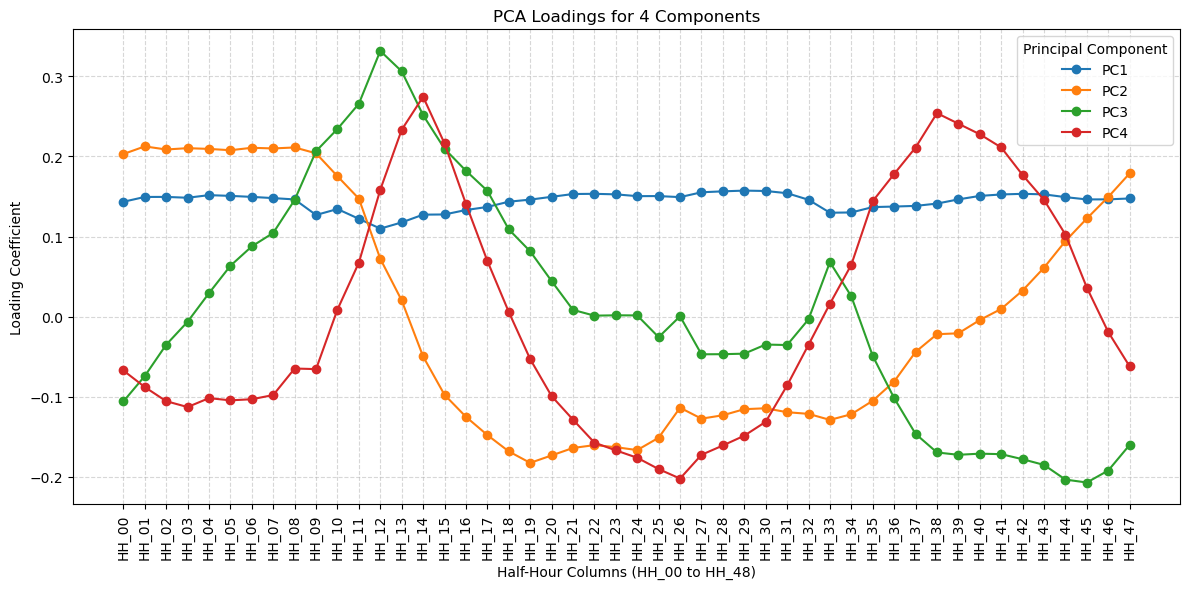

In [80]:

# ------------------------------------------------------------------------------
# 1) Fit PCA and extract loadings
# ------------------------------------------------------------------------------
selected_n_components = 4  # Arbitrarily select number of components to examine
pca_chosen = PCA(n_components=selected_n_components, random_state=42)
pca_chosen.fit(data_24_scaled)

# PCA loadings = pca.components_, shape is (n_components, n_features)
# By convention: row i = coefficients of PC i across the original features
# Make a DataFrame where rows = PC1..PCn, columns = HH_00..HH_48
loadings_df = pd.DataFrame(
    pca_chosen.components_,
    columns=data_24.columns,
    index=[f"PC{i+1}" for i in range(selected_n_components)]
)

# ------------------------------------------------------------------------------
# 2) Plot Loadings vs HH (Each line is a Component)
# ------------------------------------------------------------------------------
plt.figure(figsize=(12, 6))

for component in loadings_df.index:
    plt.plot(loadings_df.columns, loadings_df.loc[component], marker='o', label=component)

plt.xlabel("Half-Hour Columns (HH_00 to HH_48)")
plt.ylabel("Loading Coefficient")
plt.title(f"PCA Loadings for {selected_n_components} Components")
plt.xticks(rotation=90)
plt.legend(title="Principal Component", loc="upper right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



#### PCA Measure function

In [81]:
import numpy as np

def clustermeasure(vec1, vec2, alpha):
    """
    Compute similarity measure between two 48-dimensional vectors (half-hour readings).
    
    The measure is:
        0.8 * sum(|(v1[h] / mean(v1)) - (v2[h] / mean(v2))|) + 
        0.2 * |mean(v1) - mean(v2)|

    Parameters
    ----------
    vec1 : array-like of shape (48,)
        48 half-hour readings for entity 1
    vec2 : array-like of shape (48,)
        48 half-hour readings for entity 2

    Returns
    -------
    float
        The cluster measure (smaller means more similar).
    """
    mean1 = vec1.mean()
    mean2 = vec2.mean()
    # Differences from each vector's mean
    centered_diff = np.abs((vec1 / mean1) - (vec2 / mean2))
    measure_centered = np.sum(centered_diff)
    measure_mean = np.abs(mean1 - mean2)
    
    return (alpha) * measure_centered + (1-alpha) * measure_mean
# ------------------------------------------------------------------------------
# Define a utility to compute the average clustermeasure to cluster centroids
# ------------------------------------------------------------------------------
def average_clustermeasure_to_centroid(data_original, labels, n_clusters, cluster_centroids, alpha):
    """
    Compute the average clustermeasure between each point and its cluster centroid
    in the original 48-dimensional space.
    
    Parameters
    ----------
    data_original : ndarray, shape (n_samples, 48)
        Original 48-HH data 
    labels : ndarray, shape (n_samples,)
        Cluster labels for each sample.
    n_clusters : int
        Number of clusters.
    cluster_centroids : ndarray, shape (n_clusters, 48)
        Centroids in the *original domain* (48-HH). 

    
    Returns
    -------
    float
        Average cluster measure across all points with respect to their cluster centroid
    """
    n_samples = data_original.shape[0]
    sum_measure = 0.0
    for i in range(n_samples):
        c = labels[i]
        sum_measure += clustermeasure(data_original[i], cluster_centroids[c], alpha)
    return sum_measure / n_samples 


C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

    n_components  n_clusters  silhouette  avg_clustermeasure
0              4           2    0.260712            8.202197
1              4           3    0.254599            7.974486
2              4           4    0.228235            7.729384
3              4           5    0.214055            7.551483
4              4           6    0.191150            7.449010
..           ...         ...         ...                 ...
67            20           5    0.057801            7.885642
68            20           6    0.054241            7.869322
69            20           7    0.053925            7.830996
70            20           8    0.031882            7.634076
71            20           9    0.034046            7.581899

[72 rows x 4 columns]


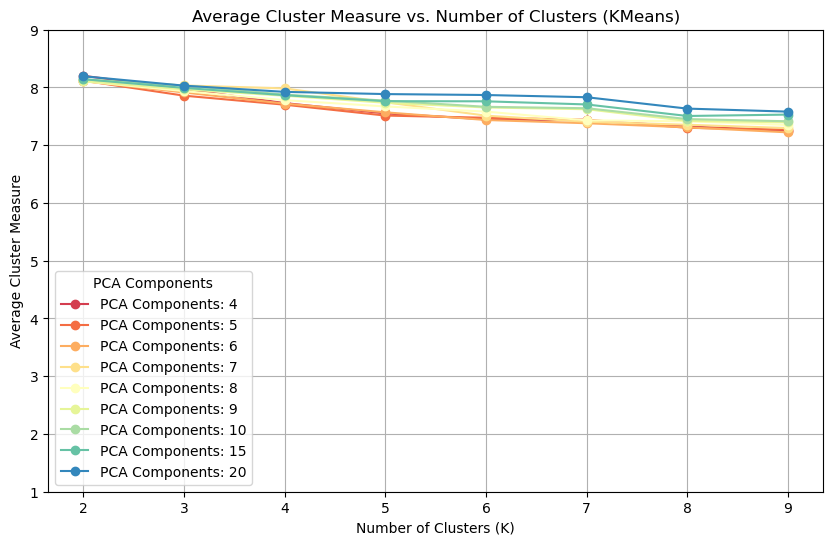

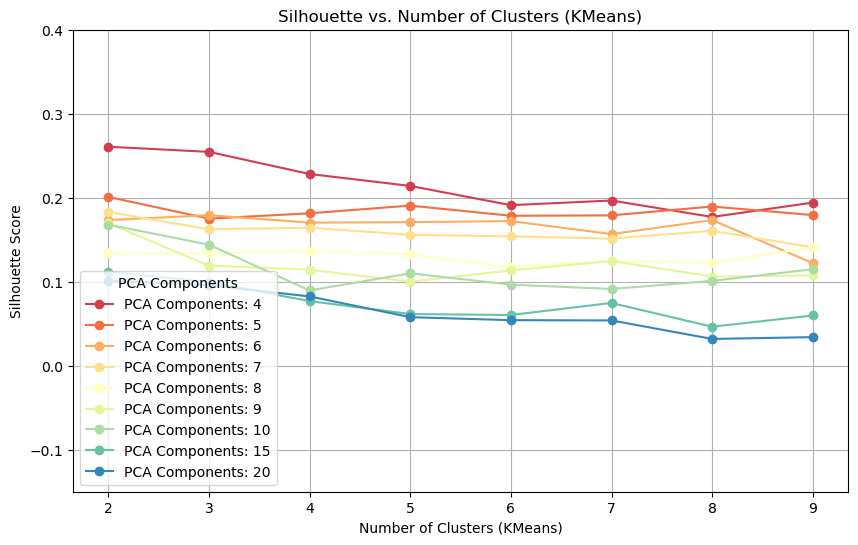

C:\Users\gerva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


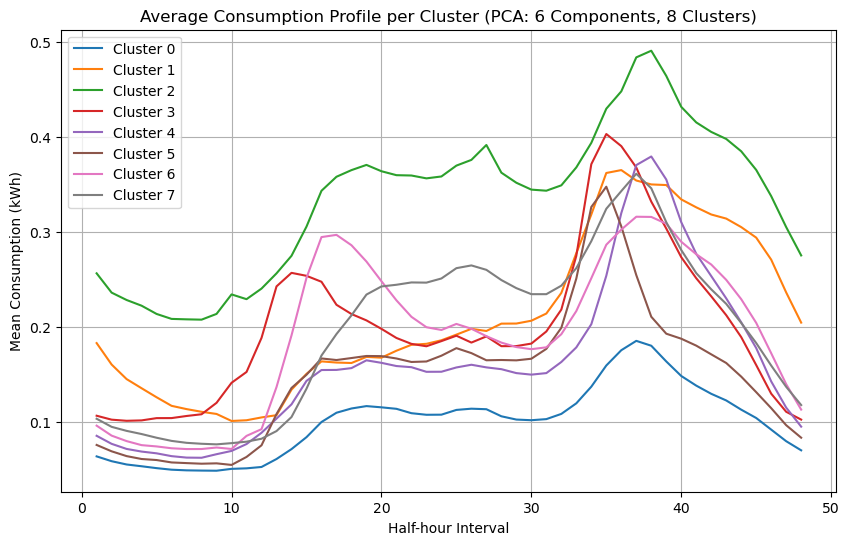

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

manyclusters = 10

# ----------------------------------------------------------------------------
# 0) Prepare your data from df24_clean
# ----------------------------------------------------------------------------
df24_clean = df24_clean.copy()

# Preserve ANON_ID as a column
anon_ids = df24_clean["ANON_ID"].values

# Prepare data for PCA and clustering
data_24 = df24_clean.drop(columns=["ANON_ID"])  # the 48 HH columns
data_24_values = data_24.values.astype(np.float64)

# Scale the data
scaler_raw = StandardScaler()
data_24_scaled = scaler_raw.fit_transform(data_24_values)

# ----------------------------------------------------------------------------
# 1) Range of PCA components and cluster counts
# ----------------------------------------------------------------------------
n_components_list = [4, 5, 6, 7, 8, 9, 10, 15, 20]
clusters_range = range(2, manyclusters)

results = []

for n_comp in n_components_list:
    pca = PCA(n_components=n_comp, random_state=42)
    pca_scores = pca.fit_transform(data_24_scaled)

    scaler_pca = StandardScaler()
    pca_scores_scaled = scaler_pca.fit_transform(pca_scores)

    for k in clusters_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(pca_scores_scaled)

        sil_score = silhouette_score(pca_scores_scaled, labels)

        cluster_centers_pca = scaler_pca.inverse_transform(kmeans.cluster_centers_)
        cluster_centers_scaled = pca.inverse_transform(cluster_centers_pca)
        cluster_centers_original = scaler_raw.inverse_transform(cluster_centers_scaled)

        avg_meas = average_clustermeasure_to_centroid(
            data_original=data_24_values,
            labels=labels,
            n_clusters=k,
            cluster_centroids=cluster_centers_original,
            alpha=0.8
        )

        results.append({
            "n_components": n_comp,
            "n_clusters": k,
            "silhouette": sil_score,
            "avg_clustermeasure": avg_meas
        })

# ----------------------------------------------------------------------------
# 2) Plot Results
# ----------------------------------------------------------------------------
results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(10, 6))
colors = sns.color_palette("Spectral", len(results_df["n_components"].unique()))

for i, n_comp in enumerate(results_df["n_components"].unique()):
    subset = results_df[results_df["n_components"] == n_comp]
    plt.plot(
        subset["n_clusters"], subset["avg_clustermeasure"], marker='o', linestyle='-',
        label=f'PCA Components: {n_comp}', color=colors[i]
    )

plt.title('Average Cluster Measure vs. Number of Clusters (KMeans)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Cluster Measure')
plt.xticks(range(2, manyclusters))
plt.legend(title="PCA Components")
plt.grid(True)
plt.ylim(1, 9)
plt.show()

plt.figure(figsize=(10, 6))
colors = sns.color_palette("Spectral", len(results_df["n_components"].unique()))

for i, n_comp in enumerate(results_df["n_components"].unique()):
    subset = results_df[results_df["n_components"] == n_comp]
    plt.plot(
        subset["n_clusters"], subset["silhouette"], marker='o', linestyle='-',
        label=f'PCA Components: {n_comp}', color=colors[i]
    )

plt.title("Silhouette vs. Number of Clusters (KMeans)")
plt.xlabel("Number of Clusters (KMeans)")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, manyclusters))
plt.legend(title="PCA Components")
plt.grid(True)
plt.ylim(-0.15, 0.4)
plt.show()

# ----------------------------------------------------------------------------
# 3) PCA + KMeans Final Fit for Visualization
# ----------------------------------------------------------------------------
n_components = 6
n_clusters = 8

pca = PCA(n_components=n_components, random_state=42)
pca_scores = pca.fit_transform(data_24_scaled)

scaler_pca = StandardScaler()
pca_scores_scaled = scaler_pca.fit_transform(pca_scores)

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(pca_scores_scaled)

cluster_centers_pca = scaler_pca.inverse_transform(kmeans.cluster_centers_)
cluster_centers_scaled = pca.inverse_transform(cluster_centers_pca)
cluster_centers_original = scaler_raw.inverse_transform(cluster_centers_scaled)

plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.plot(range(1, 49), cluster_centers_original[cluster], label=f'Cluster {cluster}')

plt.xlabel("Half-hour Interval")
plt.ylabel("Mean Consumption (kWh)")
plt.title("Average Consumption Profile per Cluster (PCA: 6 Components, 8 Clusters)")
plt.legend()
plt.grid(True)
plt.show()


### Find optimal number of clusters

In [103]:
import pandas as pd

# Count the number of households (ANON_IDs) per cluster
cluster_counts = pd.Series(labels).value_counts().sort_index()

# Convert to a DataFrame for better readability
cluster_counts_df = pd.DataFrame({
    "Cluster": cluster_counts.index,
    "Household Count": cluster_counts.values
})

# Display the table
print(cluster_counts_df)

# Save to CSV for further analysis
cluster_counts_df.to_csv("cluster_household_counts.csv", index=False)


   Cluster  Household Count
0        0              274
1        1               38
2        2               28
3        3               30
4        4               78
5        5               93
6        6               57
7        7              106


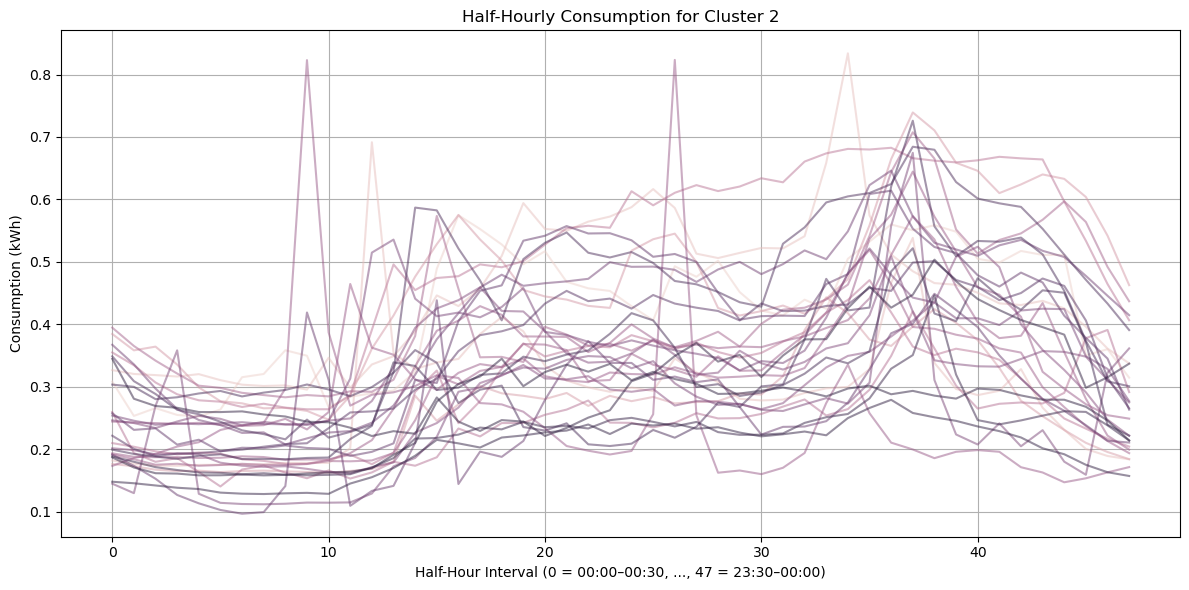

In [104]:
import seaborn as sns
import pandas as pd

# Step 1: Assign cluster labels to the original data
df_with_labels = data_24.copy()
df_with_labels['Cluster'] = labels
df_with_labels['ANON_ID'] = data_24.index  # Optional: if ANON_ID is the index, reset or assign it here

# Step 2: Melt to long format for plotting
df_long = df_with_labels.melt(
    id_vars=['ANON_ID', 'Cluster'],
    value_vars=[f'HH_{i:02d}' for i in range(48)],
    var_name='HalfHour',
    value_name='Consumption_kWh'
)

# Convert 'HH_00' → 0, ..., 'HH_47' → 47
df_long['HalfHour'] = df_long['HalfHour'].str.extract(r'(\d+)').astype(int)

# Step 3: Plot for a specific cluster
cluster_id = 2  # <-- Change this to any cluster you want to visualize
df_cluster = df_long[df_long['Cluster'] == cluster_id]

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_cluster,
    x='HalfHour',
    y='Consumption_kWh',
    hue='ANON_ID',
    legend=False,
    alpha=0.5
)
plt.title(f"Half-Hourly Consumption for Cluster {cluster_id}")
plt.xlabel("Half-Hour Interval (0 = 00:00–00:30, ..., 47 = 23:30–00:00)")
plt.ylabel("Consumption (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()


Group
Intervention    6670464
Control         5540480
Name: count, dtype: int64
                                             ANON_ID  Cluster         Group
0  0045034694b28ba56978092fc4dd601c58774fd74c30b7...        0  Intervention
1  0045034694b28ba56978092fc4dd601c58774fd74c30b7...        0  Intervention
2  0045034694b28ba56978092fc4dd601c58774fd74c30b7...        0  Intervention
3  0045034694b28ba56978092fc4dd601c58774fd74c30b7...        0  Intervention
4  0045034694b28ba56978092fc4dd601c58774fd74c30b7...        0  Intervention


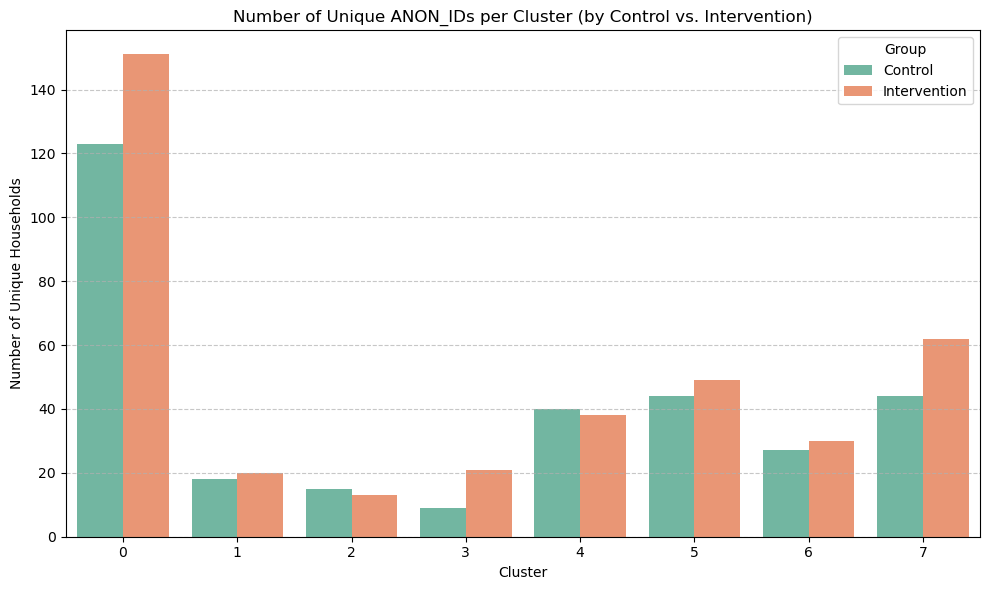

In [107]:
# Step 1: Create dataframe with cluster labels
df_clusters = pd.DataFrame({
    'ANON_ID': anon_ids,     # from the PCA + KMeans section
    'Cluster': labels        # assigned KMeans cluster
})

# Step 2: Add 'Group' column from control/intervention pre-period
df_group_info = pd.concat([
    df_controlpre[['ANON_ID']].assign(Group='Control'),
    df_interventionpre[['ANON_ID']].assign(Group='Intervention')
], ignore_index=True)

# Step 3: Merge clusters with group info
df_cluster_group = pd.merge(df_clusters, df_group_info, on='ANON_ID', how='left')

# Step 4: Check results
print(df_cluster_group['Group'].value_counts(dropna=False))
print(df_cluster_group.head())

# Drop duplicates to ensure unique ANON_IDs per cluster/group
unique_counts = df_cluster_group[['ANON_ID', 'Cluster', 'Group']].drop_duplicates()

# Count unique ANON_IDs per cluster and group
cluster_counts_pre_unique = unique_counts.groupby(['Cluster', 'Group']).size().reset_index(name='Count')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_counts_pre_unique, x='Cluster', y='Count', hue='Group', palette='Set2')

plt.title("Number of Unique ANON_IDs per Cluster (by Control vs. Intervention)")
plt.xlabel("Cluster")
plt.ylabel("Number of Unique Households")
plt.legend(title="Group")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We have each ANON_ID with the label from a counterfactual clustering on Pre. 
Now we want to run a regression between 4-7pm consumption vs Clusters
If possible add any socioeconomic feature to the regression.

In [118]:
import pandas as pd

# Suppose df_clusters has columns: [ANON_ID, Cluster]
# Merge into df_intervention so we have a 'Cluster' column
df_intervention_merged = pd.merge(
    df_intervention,
    df_clusters[['ANON_ID','Cluster']],
    on='ANON_ID',
    how='left'    # left-join to keep all from df_intervention, fill Cluster with NaN if missing
)

# Only keep rows with a valid cluster
df_intervention_merged = df_intervention_merged.dropna(subset=['Cluster'])
print(f"[INFO] After merging cluster info => shape: {df_intervention_merged.shape}")


[INFO] After merging cluster info => shape: (340, 7)


In [119]:
df_intervention_merged

,ANON_ID,Group,Post,Pre,Reduction_%,Free_Energy_Bracket,Cluster
0,0045034694b28ba56978092fc4dd601c58774fd74c30b7...,Intervention,0.181874,0.178822,-1.706560,No Reward (< 5%),0.0
2,01c05e36af0caaf19d6c35e0340d015ab07e742aa14fda...,Intervention,0.263910,0.245933,-7.309892,No Reward (< 5%),1.0
3,03edaa0ab8ac6da0cf0a3c4f9e7bd6e65ba4bd4dec3ee3...,Intervention,0.077191,0.102109,24.403016,Free Sun 8am-4pm (20-34.9%),0.0
4,04ef482b455c0a46fd1d52a1a4cc8a11cb89424035d2f2...,Intervention,0.306281,0.309915,1.172575,No Reward (< 5%),3.0
5,04fef70b0ec49afb0cbcddbaaef57a679c2d4dcd754c5f...,Intervention,0.349290,0.373171,6.399407,Free Sun 8am-12pm (5-19.9%),4.0
...,...,...,...,...,...,...,...
585,fbf0f4c5cade26ca8c52fae2df49ed1997d4f75a3eaf7d...,Intervention,0.142531,0.152707,6.663857,Free Sun 8am-12pm (5-19.9%),0.0
586,fbf8d6429000c4b4ab44407072e203b19776576244c4bb...,Intervention,0.181260,0.197325,8.141202,Free Sun 8am-12pm (5-19.9%),0.0
587,fc0a5522eb55a341dc3a7970601c50fe9f1d7f4917e303...,Intervention,0.142348,0.289509,50.831248,Free Sun 8am-midnight (>=50%),5.0
588,fce880311d169db0eb15bd50e4c62479772d37ea2f2dfa...,Intervention,0.156655,0.198614,21.126023,Free Sun 8am-4pm (20-34.9%),6.0


In [122]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

# We'll do the same approach you had, but now 'Cluster' is added to the categorical_cols
df = df_intervention_merged.copy()

categorical_cols = [

    'Cluster'  # <-- NEW: cluster as a categorical variable
]

numeric_cols = []  # If you have numeric columns, put them here.

target_col = 'Reduction_%'  # We'll predict the difference (Post - Pre)

# Ensure no missing in the relevant columns
df = df.dropna(subset=categorical_cols + [target_col]).copy()

X = df[categorical_cols + numeric_cols]
y = df[target_col]

# 1) Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# 2) Column Transformer
cat_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, categorical_cols),
        ('num', num_transformer, numeric_cols)
    ]
)

# 3) Build pipeline with GradientBoostingRegressor (or another regressor)
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('gbm', GradientBoostingRegressor(
        loss='squared_error',
        n_estimators=200,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

# 4) Fit
model.fit(X_train, y_train)

# 5) Evaluate
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R^2: {r2:.3f}")
print(f"Test RMSE: {rmse:.3f}")

# 6) Feature Importances
gbm_model = model.named_steps['gbm']
importances = gbm_model.feature_importances_

# Reconstruct feature names
#   - cat_transformer => cluster of one-hot columns
#   - num_transformer => numeric_cols
ohe = model.named_steps['preprocess'].transformers_[0][1]
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

feature_names = list(ohe_feature_names) + numeric_cols

feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
for fname, imp in feat_imp[:10]:
    print(f"{fname}: {imp:.3f}")


Test R^2: 0.004
Test RMSE: 29.227
Cluster_7.0: 0.632
Cluster_4.0: 0.278
Cluster_5.0: 0.075
Cluster_3.0: 0.011
Cluster_2.0: 0.003
Cluster_6.0: 0.001
Cluster_1.0: 0.000


In [123]:
import pandas as pd

# Ensure we have a 'Delta' column (Post - Pre)
df = df_intervention_merged.copy()
if 'Delta' not in df.columns:
    df['Delta'] = df['Post'] - df['Pre']


In [124]:
import statsmodels.formula.api as smf


model = smf.ols("Delta ~ C(Cluster)", data=df).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Delta   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.748
Date:                Wed, 26 Mar 2025   Prob (F-statistic):             0.0972
Time:                        22:11:59   Log-Likelihood:                 442.56
No. Observations:                 339   AIC:                            -869.1
Df Residuals:                     331   BIC:                            -838.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0097      0.00